<a href="https://colab.research.google.com/github/elianramon/Projetos_CD_Avanti_Bootcamp_2025.3/blob/main/01_analise_exploratoria_de_dados_grupo_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PARTE 01**

# Análise Exploratória de Dados

- Conjunto de dados: `spanish_wines` (Vinhos Espanhóis)
- Cientistas de dados:
  - Elian Ramon de Sarges Rodrigues
  - Rodrigo Ferreira Costa Pinto
---

# **Descrição do Dataset**

Este conjunto de dados está relacionado a variantes tintas de vinhos espanhóis. O conjunto de dados descreve diversas métricas de popularidade e descrição, e seu efeito sobre a qualidade. Os conjuntos de dados podem ser usados ​​para tarefas de **classificação ou regressão**. As classes são ordenadas e não balanceadas (*ou seja, a qualidade varia de quase 5 a 4 pontos*). A tarefa consiste em prever a qualidade do vinho ou os preços usando os dados fornecidos.

O conjunto de dados contém 7.500 tipos diferentes de vinhos tintos da Espanha, com 11 características que descrevem seu preço, classificação e até mesmo alguma descrição de sabor. Os dados foram coletados por mim por meio de web scraping de diferentes fontes (de páginas especializadas em vinhos a supermercados).

## Informações de Atributos
1. vinícola: Nome da vinícola
2. vinho: Nome do vinho
3. ano: Ano em que as uvas foram colhidas
4. classificação: Classificação média dada ao vinho pelos usuários [de 1 a 5]
5. num_reviews: Número de usuários que avaliaram o vinho
6. país: País de origem [Espanha]
7. região: Região do vinho
8. preço: Preço em euros [€]
9. tipo: Variedade de vinho
10. corpo: Pontuação corporal, definida como a riqueza e o peso do vinho na boca [de 1 a 5]
11. acidez: Pontuação de acidez, definida como a “ruga” ou acidez do vinho; é o que torna um vinho refrescante e sua língua saliva e quer outro gole [de 1 a 5]

[Link Fonte](https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset).

CRISP DM
<center><img width="60%" src="https://i.postimg.cc/3wBmx1zb/crisp-dm.png"></center>

## Preparação
- Carregamento de bibliotecas
- Configuração de estilo dos graficos
- Leitura do conjunto de dados

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Leitura do conjunto de dados

In [ ]:
# Carregamento de dado bruto via Github

url_github = 'https://raw.githubusercontent.com/atlantico-academy/datasets/refs/heads/main/spanish_wines.csv'
df = pd.read_csv(url_github)

print(f'Tamanho do dataset: {df.shape}') # Tamanho

df.head() # Visualização

Tamanho do dataset: (7500, 11)


,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


## Descrição dos dados
### Dicionário de dados

In [ ]:
df_dict = pd.DataFrame([
    {
        "variavel": "winery",
        "descricao": "Nome da vinícola.",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "wine",
        "descricao": "Nome do vinho",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "year",
        "descricao": "Ano em que as uvas foram colhidas",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "rating",
        "descricao": "Classificação média dada ao vinho pelos usuários [de 1 a 5].",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "num_reviews",
        "descricao": "Número de usuários que avaliaram o vinho",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "country",
        "descricao": "País de origem [Espanha]",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "region",
        "descricao": "Região do vinho.",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
      {
        "variavel": "price",
        "descricao": "Preço em euros [€]",
        "tipo": "quantitativa",
        "subtipo": "continua",
    },
      {
        "variavel": "type",
        "descricao": "Variedade de vinho",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
      {
        "variavel": "body",
        "descricao": "Pontuação corporal, definida como a riqueza e o peso do vinho na boca [de 1 a 5]",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
      {
        "variavel": "acidity",
        "descricao": "Pontuação de acidez, definida como a “ruga” ou acidez do vinho; é o que torna um vinho refrescante e sua língua saliva e quer outro gole [de 1 a 5]",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    }
])
df_dict

,variavel,descricao,tipo,subtipo
0,winery,Nome da vinícola.,qualitativa,nominal
1,wine,Nome do vinho,qualitativa,nominal
2,year,Ano em que as uvas foram colhidas,quantitativa,discreta
3,rating,Classificação média dada ao vinho pelos usuári...,quantitativa,discreta
4,num_reviews,Número de usuários que avaliaram o vinho,quantitativa,discreta
5,country,País de origem [Espanha],qualitativa,nominal
6,region,Região do vinho.,qualitativa,nominal
7,price,Preço em euros [€],quantitativa,continua
8,type,Variedade de vinho,qualitativa,nominal
9,body,"Pontuação corporal, definida como a riqueza e ...",quantitativa,discreta


## Análise Univariada
### Resumo estatístico

In [ ]:
print(f"Variáveis Qualitativas\n {df.describe(include='object')}\n")
print("*-º"*25)
print(f"Variáveis Quantitativas\n {df.describe()}")

Variáveis Qualitativas
          winery     wine  year country region       type
count      7500     7500  7498    7500   7500       6955
unique      480      847    71       1     76         21
top     Contino  Reserva  2011  Espana  Rioja  Rioja Red
freq        457      467  1190    7500   2440       2357

*-º*-º*-º*-º*-º*-º*-º*-º*-º*-º*-º*-º*-º*-º*-º*-º*-º*-º*-º*-º*-º*-º*-º*-º*-º
Variáveis Quantitativas
             rating   num_reviews        price         body      acidity
count  7500.000000   7500.000000  7500.000000  6331.000000  6331.000000
mean      4.254933    451.109067    60.095822     4.158427     2.946612
std       0.118029    723.001856   150.356676     0.583352     0.248202
min       4.200000     25.000000     4.990000     2.000000     1.000000
25%       4.200000    389.000000    18.900000     4.000000     3.000000
50%       4.200000    404.000000    28.530000     4.000000     3.000000
75%       4.200000    415.000000    51.350000     5.000000     3.000000
max       4.9

# Distribuição de variáveis


## Variáveis Qualitativas


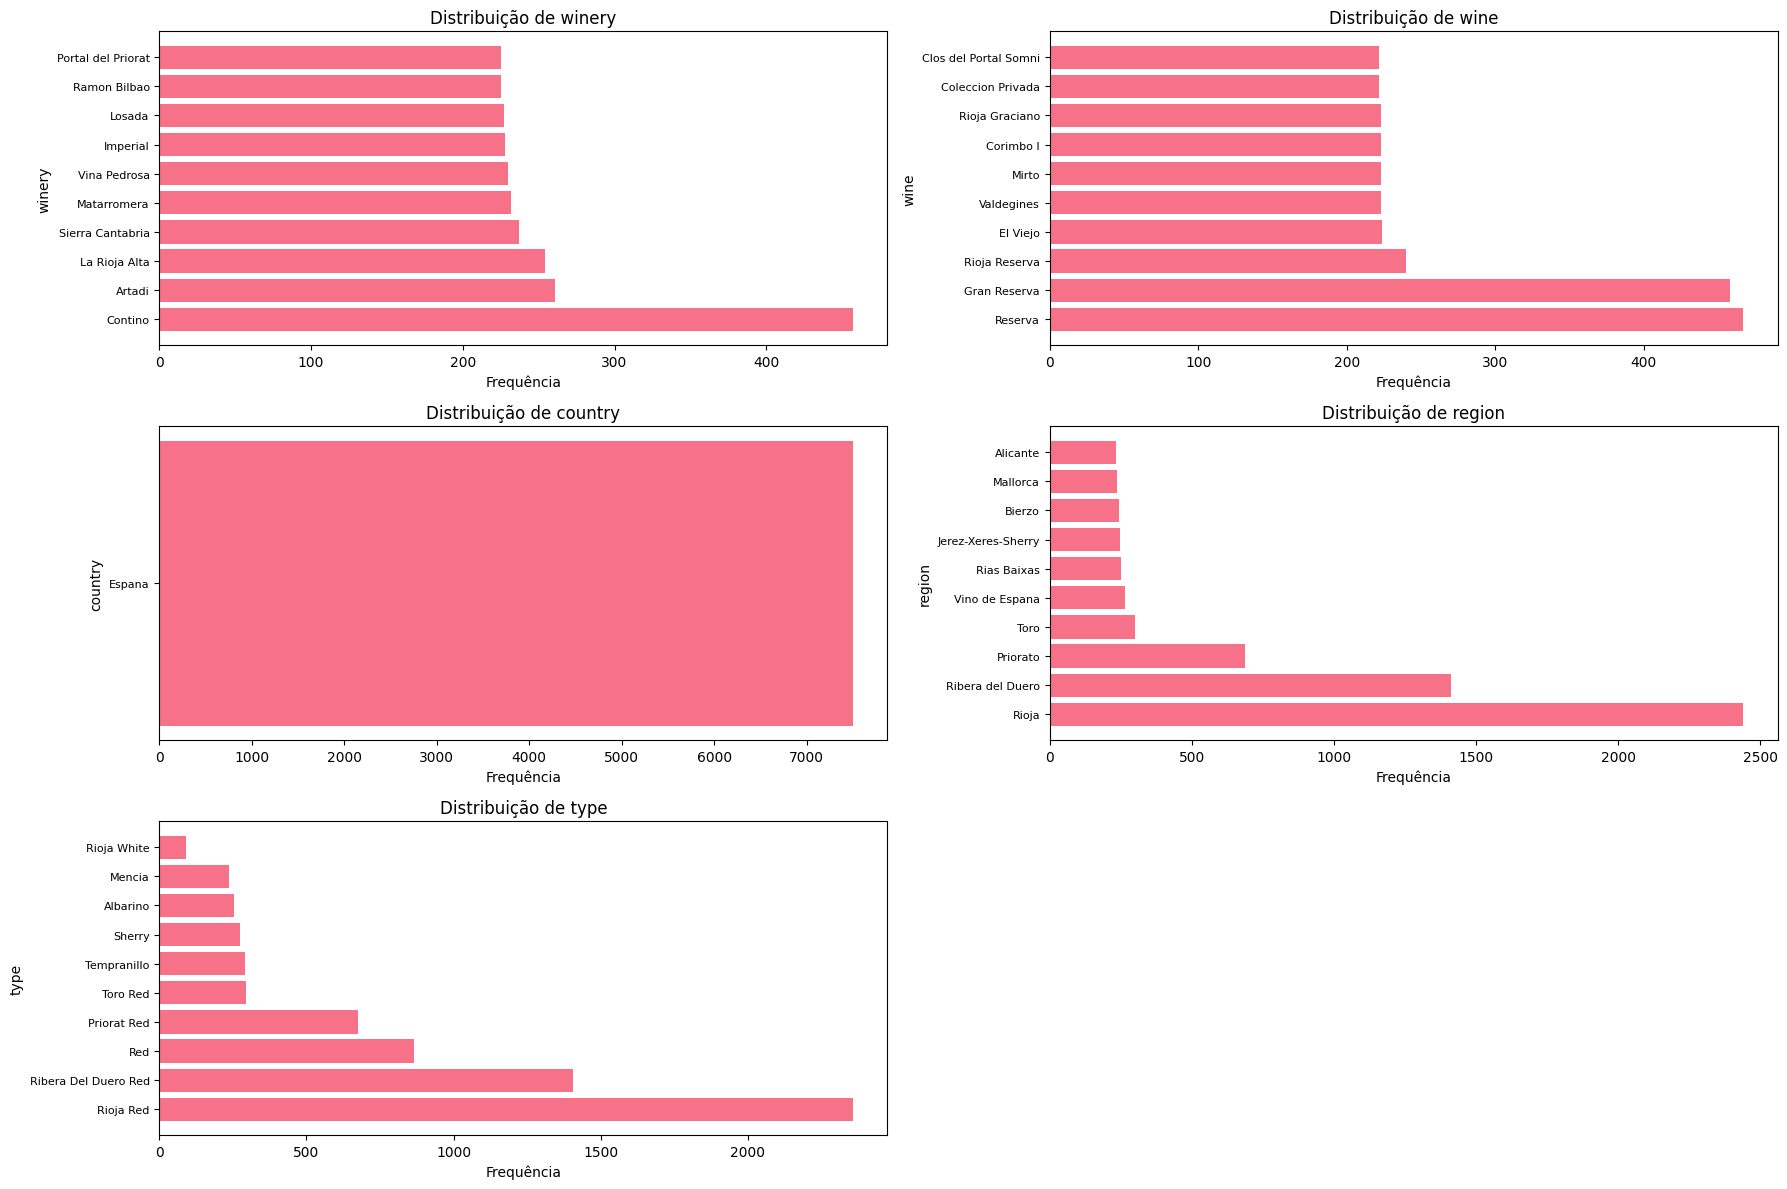

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo
plt.style.use('default')
sns.set_palette("husl")

# Lista das variáveis qualitativas
variaveis_qualitativas = ['winery', 'wine', 'country', 'region', 'type']

# Criar subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()

for i, variavel in enumerate(variaveis_qualitativas):
    # Contar valores e pegar os top 10 (para evitar muitos valores)
    counts = df[variavel].value_counts().head(10)

    # Gráfico de barras
    axes[i].barh(counts.index, counts.values)
    axes[i].set_title(f'Distribuição de {variavel}')
    axes[i].set_xlabel('Frequência')
    axes[i].set_ylabel(variavel)
    axes[i].tick_params(axis='y', labelsize=8)

# Remover eixo vazio se houver
if len(variaveis_qualitativas) < 6:
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

### **Verificação de valores únicos nas variáveis**

##*winery, wine, country, region, type.*

##*vinícola, vinho, país, região, tipo.*

In [ ]:
a = ["winery", "wine", "country", "region", "type"]
print("Valores únicos para variáveis qualitativas\n")

for i in range(len(a)):
    print(f"{a[i]}: {df[a[i]].nunique()}")

# df.nunique() para ver por completo

Valores únicos para variáveis qualitativas

winery: 480
wine: 847
country: 1
region: 76
type: 21


In [ ]:
df['wine'].value_counts()

,count
wine,
Reserva,467
Gran Reserva,458
Rioja Reserva,240
El Viejo,224
Valdegines,223
...,...
Territorio Luthier Reserva,1
La Baraja,1
Que Bonito Cacareaba Blanco,1


### **CONSIDERAÇÕES**





----

1. A distribuição por país é uma variável descartável, pois todos os vinhos são originais da Espanha.
2. Alguns vinhos aparecem poucas vezes no dataset, outros, somente uma vez, com o total de 847 valores únicos. Talvez seja por ser marca pouco visada entre os consumidores.
3. ...


## Variáveis Quantitativas

**'rating', 'num_reviews', 'price', 'body', 'acidity'**


1. classificação: Classificação média dada ao vinho pelos usuários [de 1 a 5]
2. num_reviews: Número de usuários que avaliaram o vinho
3. preço: Preço em euros [€]
4. corpo: Pontuação corporal, definida como a riqueza e o peso do vinho na boca [de 1 a 5]
5. acidez: Pontuação de acidez, definida como a “ruga” ou acidez do vinho; é o que torna um vinho refrescante e sua língua saliva e quer outro gole [de 1 a 5]

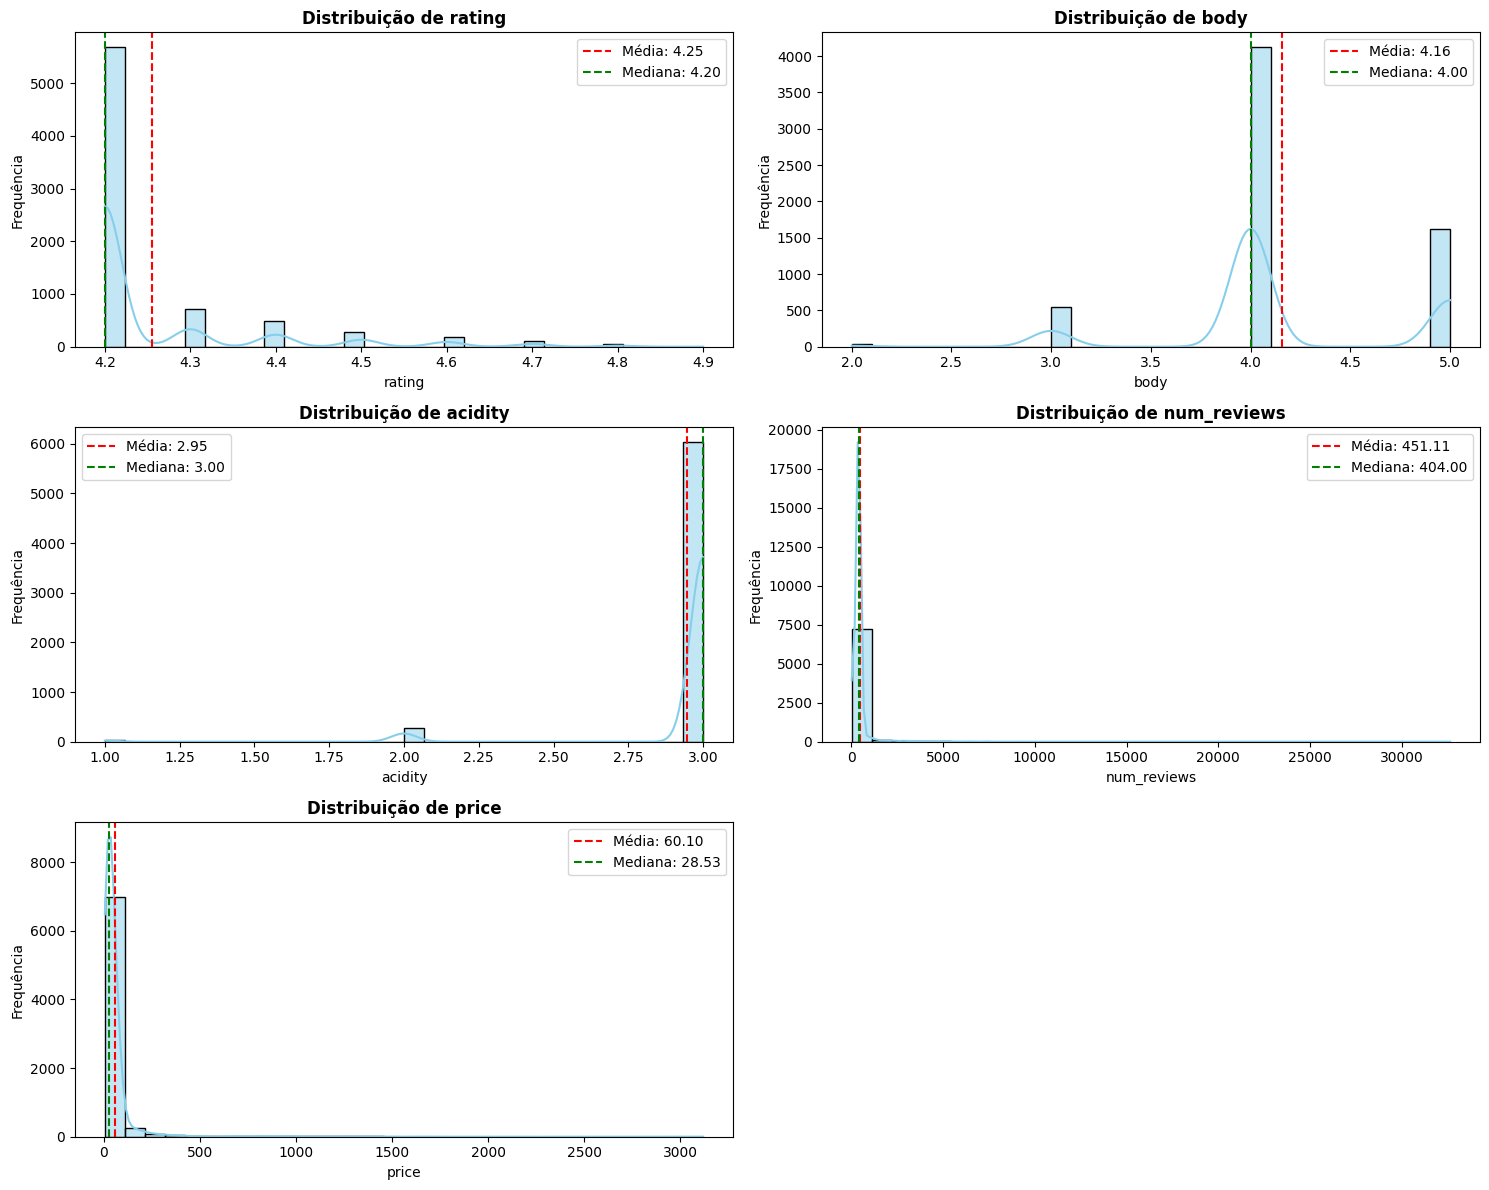

In [ ]:
# Variáveis quantitativas
variaveis_quantitativas = ['rating', 'body', 'acidity'] # Valores entre 0 e 5
variaveis_quantitativas_2 = ['num_reviews', 'price']

# Configuração dos subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

for i, var in enumerate(variaveis_quantitativas+variaveis_quantitativas_2):
    # Histograma com KDE
    sns.histplot(df[var], kde=True, ax=axes[i], bins=30, color='skyblue')
    axes[i].set_title(f'Distribuição de {var}', fontweight='bold')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequência')

    # Adicionar linhas de média e mediana
    mean_val = df[var].mean()
    median_val = df[var].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Média: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', label=f'Mediana: {median_val:.2f}')
    axes[i].legend()

# Remover eixo extra se necessário
if len(variaveis_quantitativas) < 6:
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

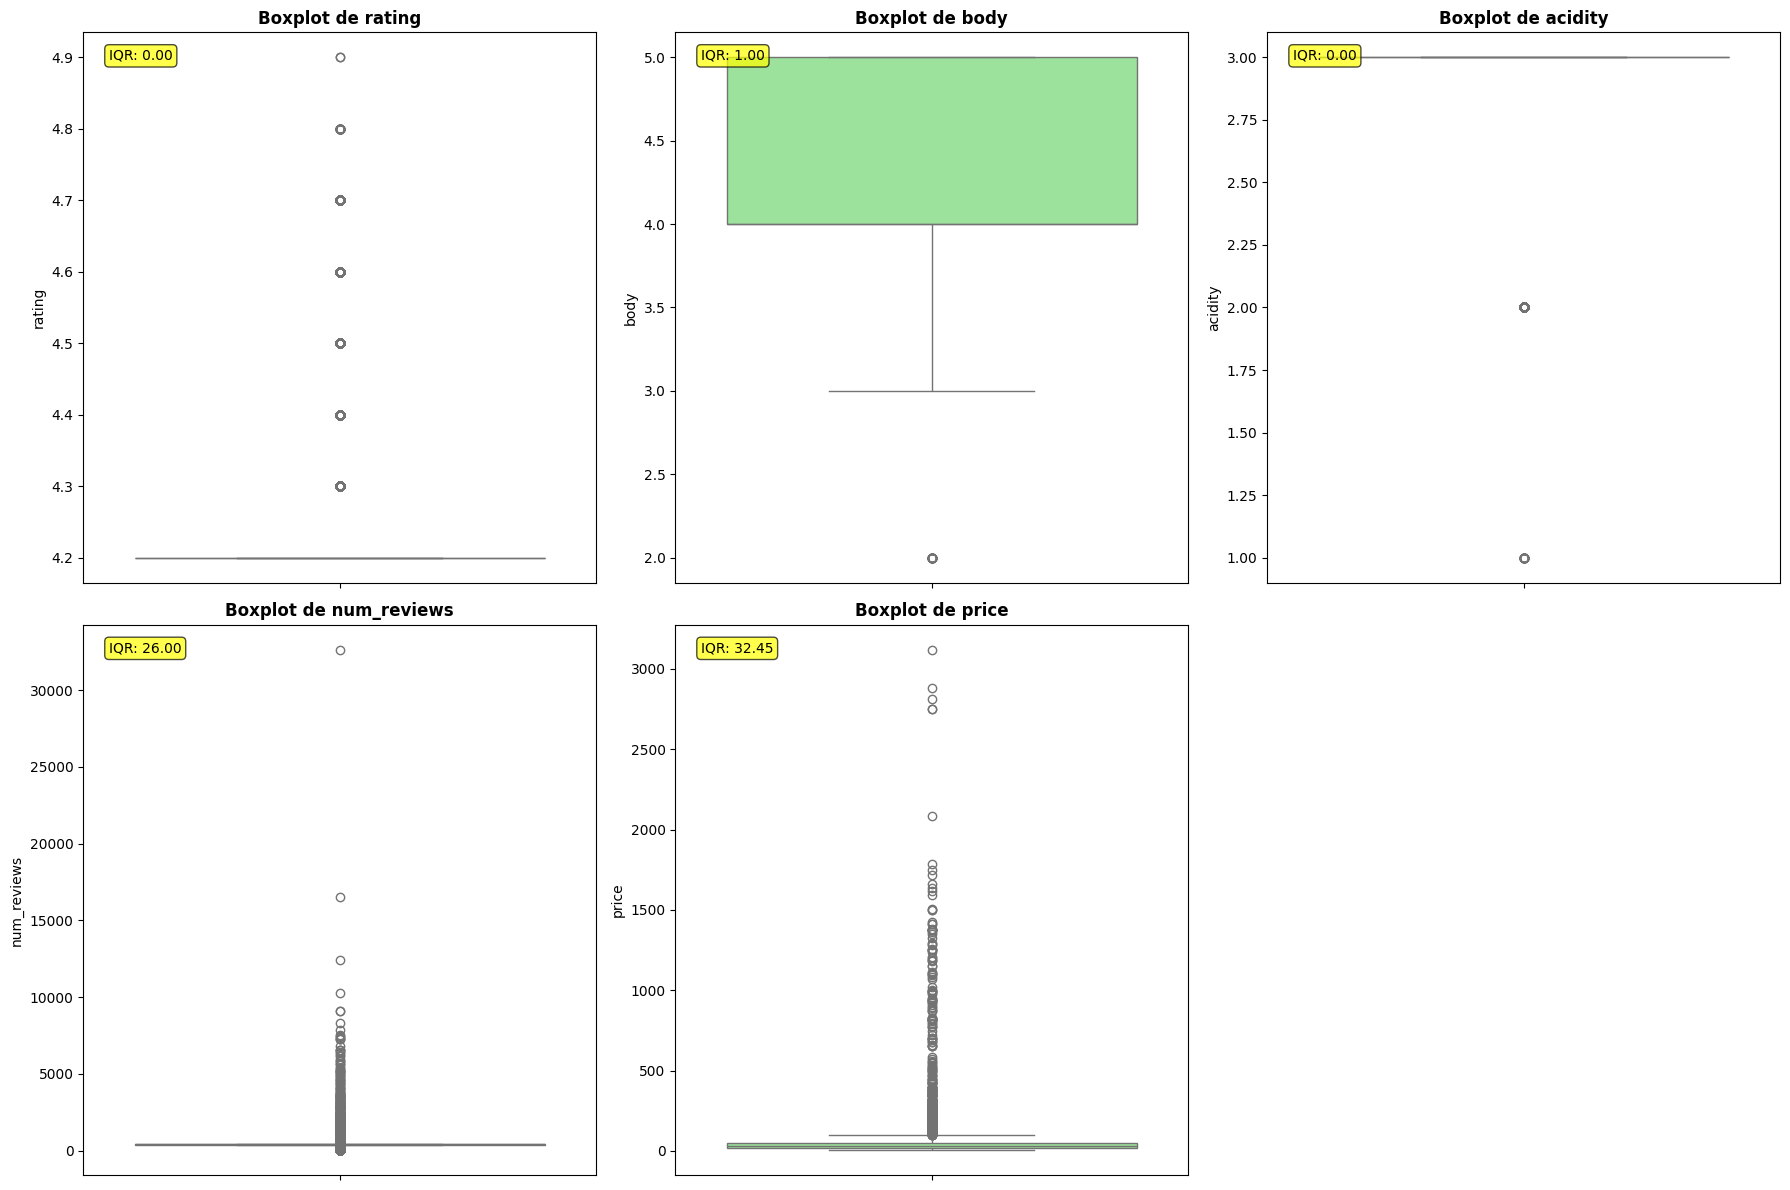

In [ ]:
# Boxplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(variaveis_quantitativas+variaveis_quantitativas_2):
    sns.boxplot(y=df[var], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot de {var}', fontweight='bold')
    axes[i].set_ylabel(var)

    # Adicionar estatísticas no gráfico
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    axes[i].text(0.05, 0.95, f'IQR: {iqr:.2f}', transform=axes[i].transAxes,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# Remover eixo extra
if len(variaveis_quantitativas) < 6:
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

### **CONSIDERAÇÕES**

____
1. Número de reviews varia bastante, possue outliers.
2. Análise de correlação apontou correlações entre rating e price.
- 2.1. rating possue a maior parte dos dados em 4.2, podendo ser uma falsa relação com o price.
3. Preço varia bastante.
4. Pouca relação entre os dados.

## Dados faltantes

In [ ]:
df.isnull().sum() # Valores Nulos

,0
winery,0
wine,0
year,2
rating,0
num_reviews,0
country,0
region,0
price,0
type,545
body,1169


Dados faltantes principalmente em "type", "body", "acidity".

## Analise bivariada
### Relação entre variáveis quantitativas
### comportamento par a par

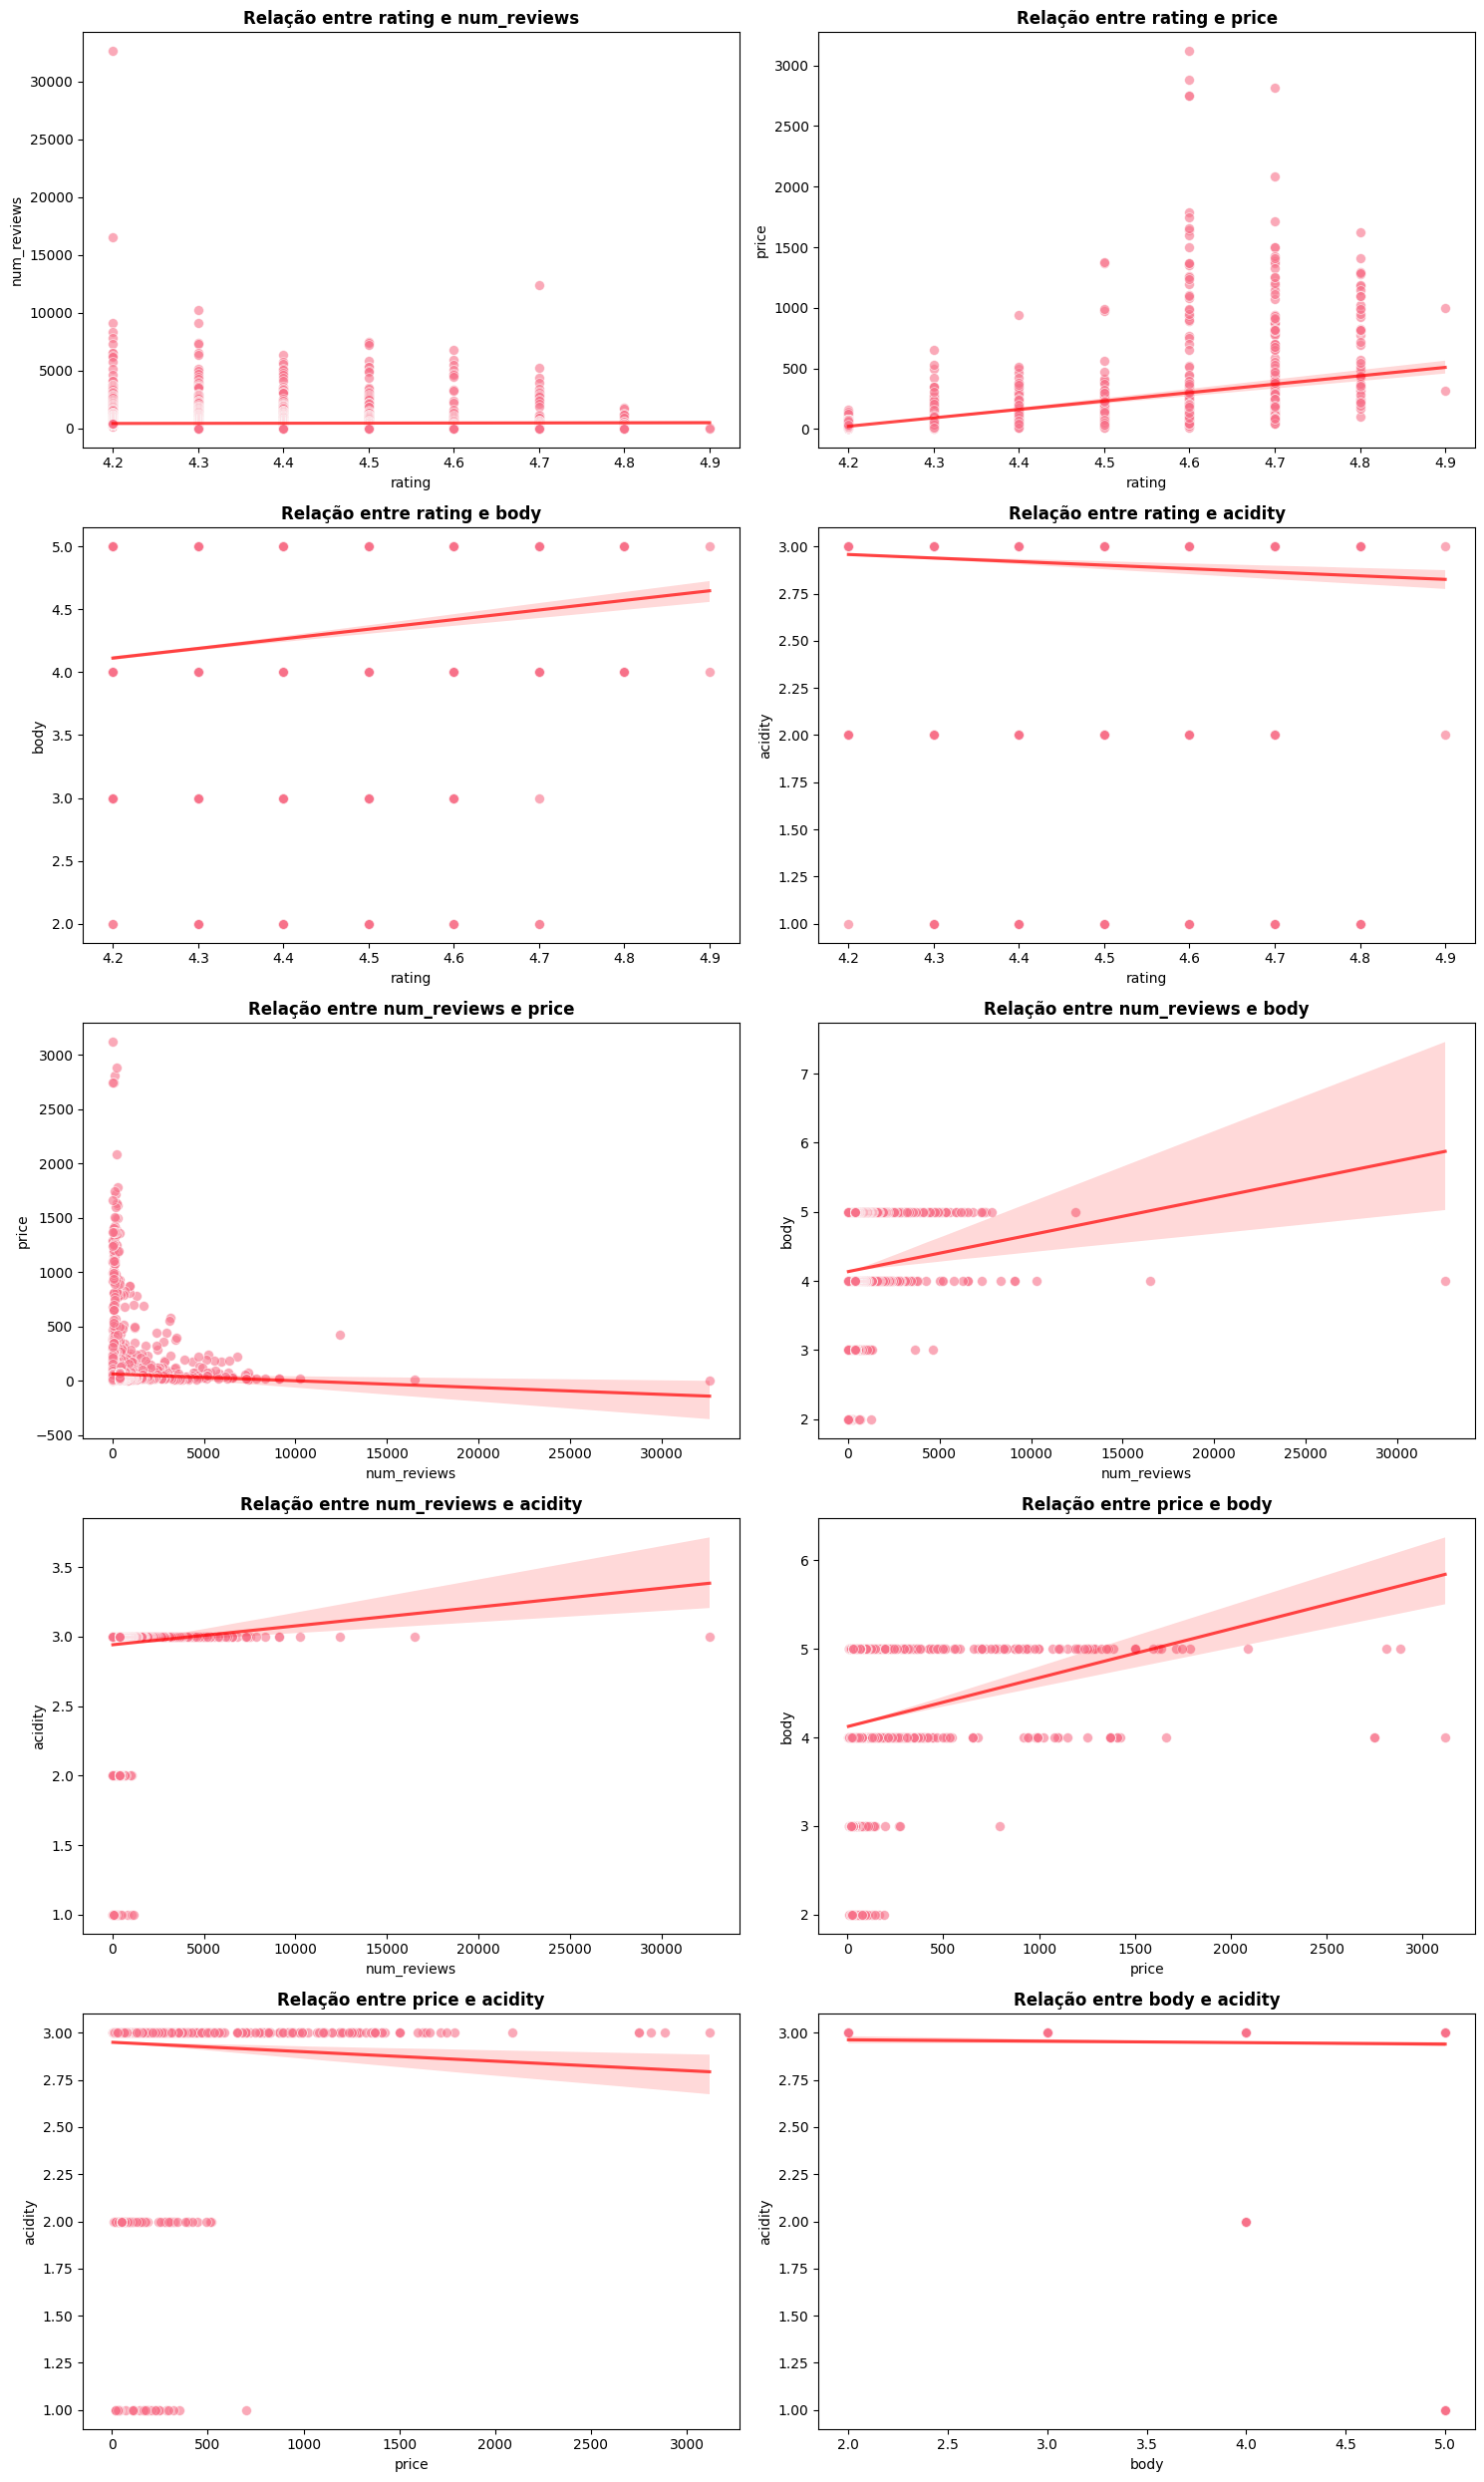

In [ ]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

# Variáveis quantitativas
variaveis_quantitativas = ['rating', 'num_reviews', 'price', 'body', 'acidity']

# Calcular número de combinações
combinacoes = list(itertools.combinations(variaveis_quantitativas, 2))
n_combinacoes = len(combinacoes)

# Configurar layout dos subplots
n_cols = 2
n_rows = (n_combinacoes + n_cols - 1) // n_cols  # Arredondar para cima

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

# Plotar cada combinação
for i, (var_1, var_2) in enumerate(combinacoes):
    # Scatter plot para relação entre duas variáveis quantitativas
    sns.scatterplot(data=df, x=var_1, y=var_2, ax=axes[i], alpha=0.6, s=50)
    axes[i].set_title(f"Relação entre {var_1} e {var_2}", fontweight='bold')
    axes[i].set_xlabel(var_1)
    axes[i].set_ylabel(var_2)

    # Adicionar linha de tendência
    try:
        sns.regplot(data=df, x=var_1, y=var_2, ax=axes[i],
                   scatter=False, line_kws={'color': 'red', 'alpha': 0.7})
    except:
        pass  # Ignora erro se não for possível calcular regressão

# Ocultar eixos extras se houver
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Relações visível entre `rating` e `price`

### Correlação

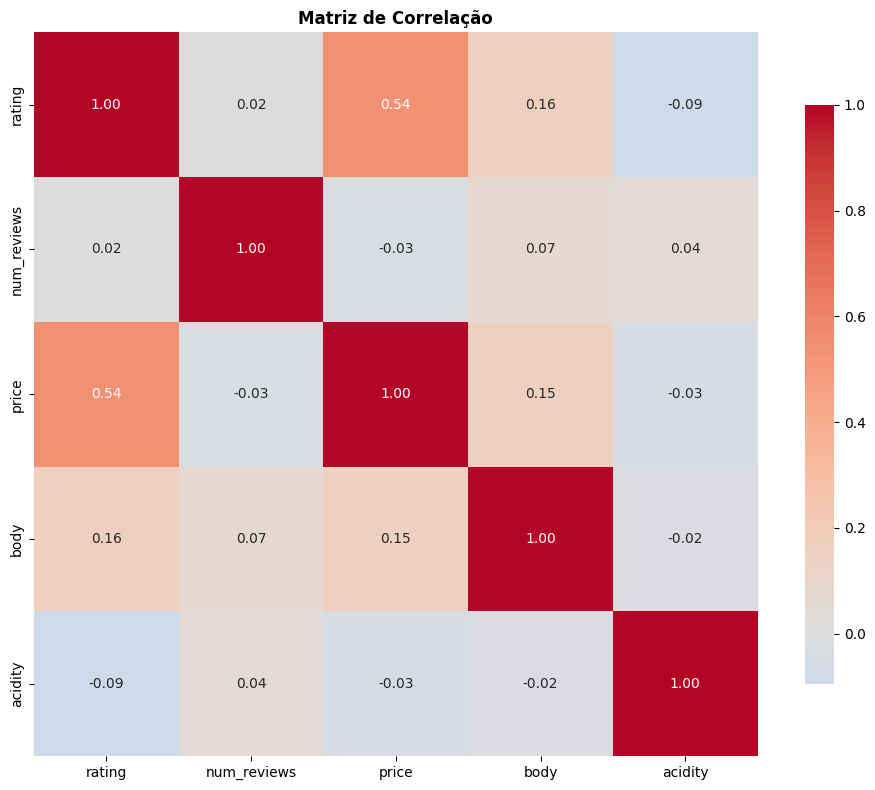

🔍 Correlações significativas:
rating x price: 0.545


In [ ]:
# Matriz de correlação
correlation_matrix = df[variaveis_quantitativas].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlação', fontweight='bold')
plt.tight_layout()
plt.show()

print("🔍 Correlações significativas:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr = correlation_matrix.iloc[i, j]
        if abs(corr) > 0.3:  # Correlações moderadas/fortes
            print(f"{correlation_matrix.columns[i]} x {correlation_matrix.columns[j]}: {corr:.3f}")

### Relação entre variáveis qualitativas
### Contingencia

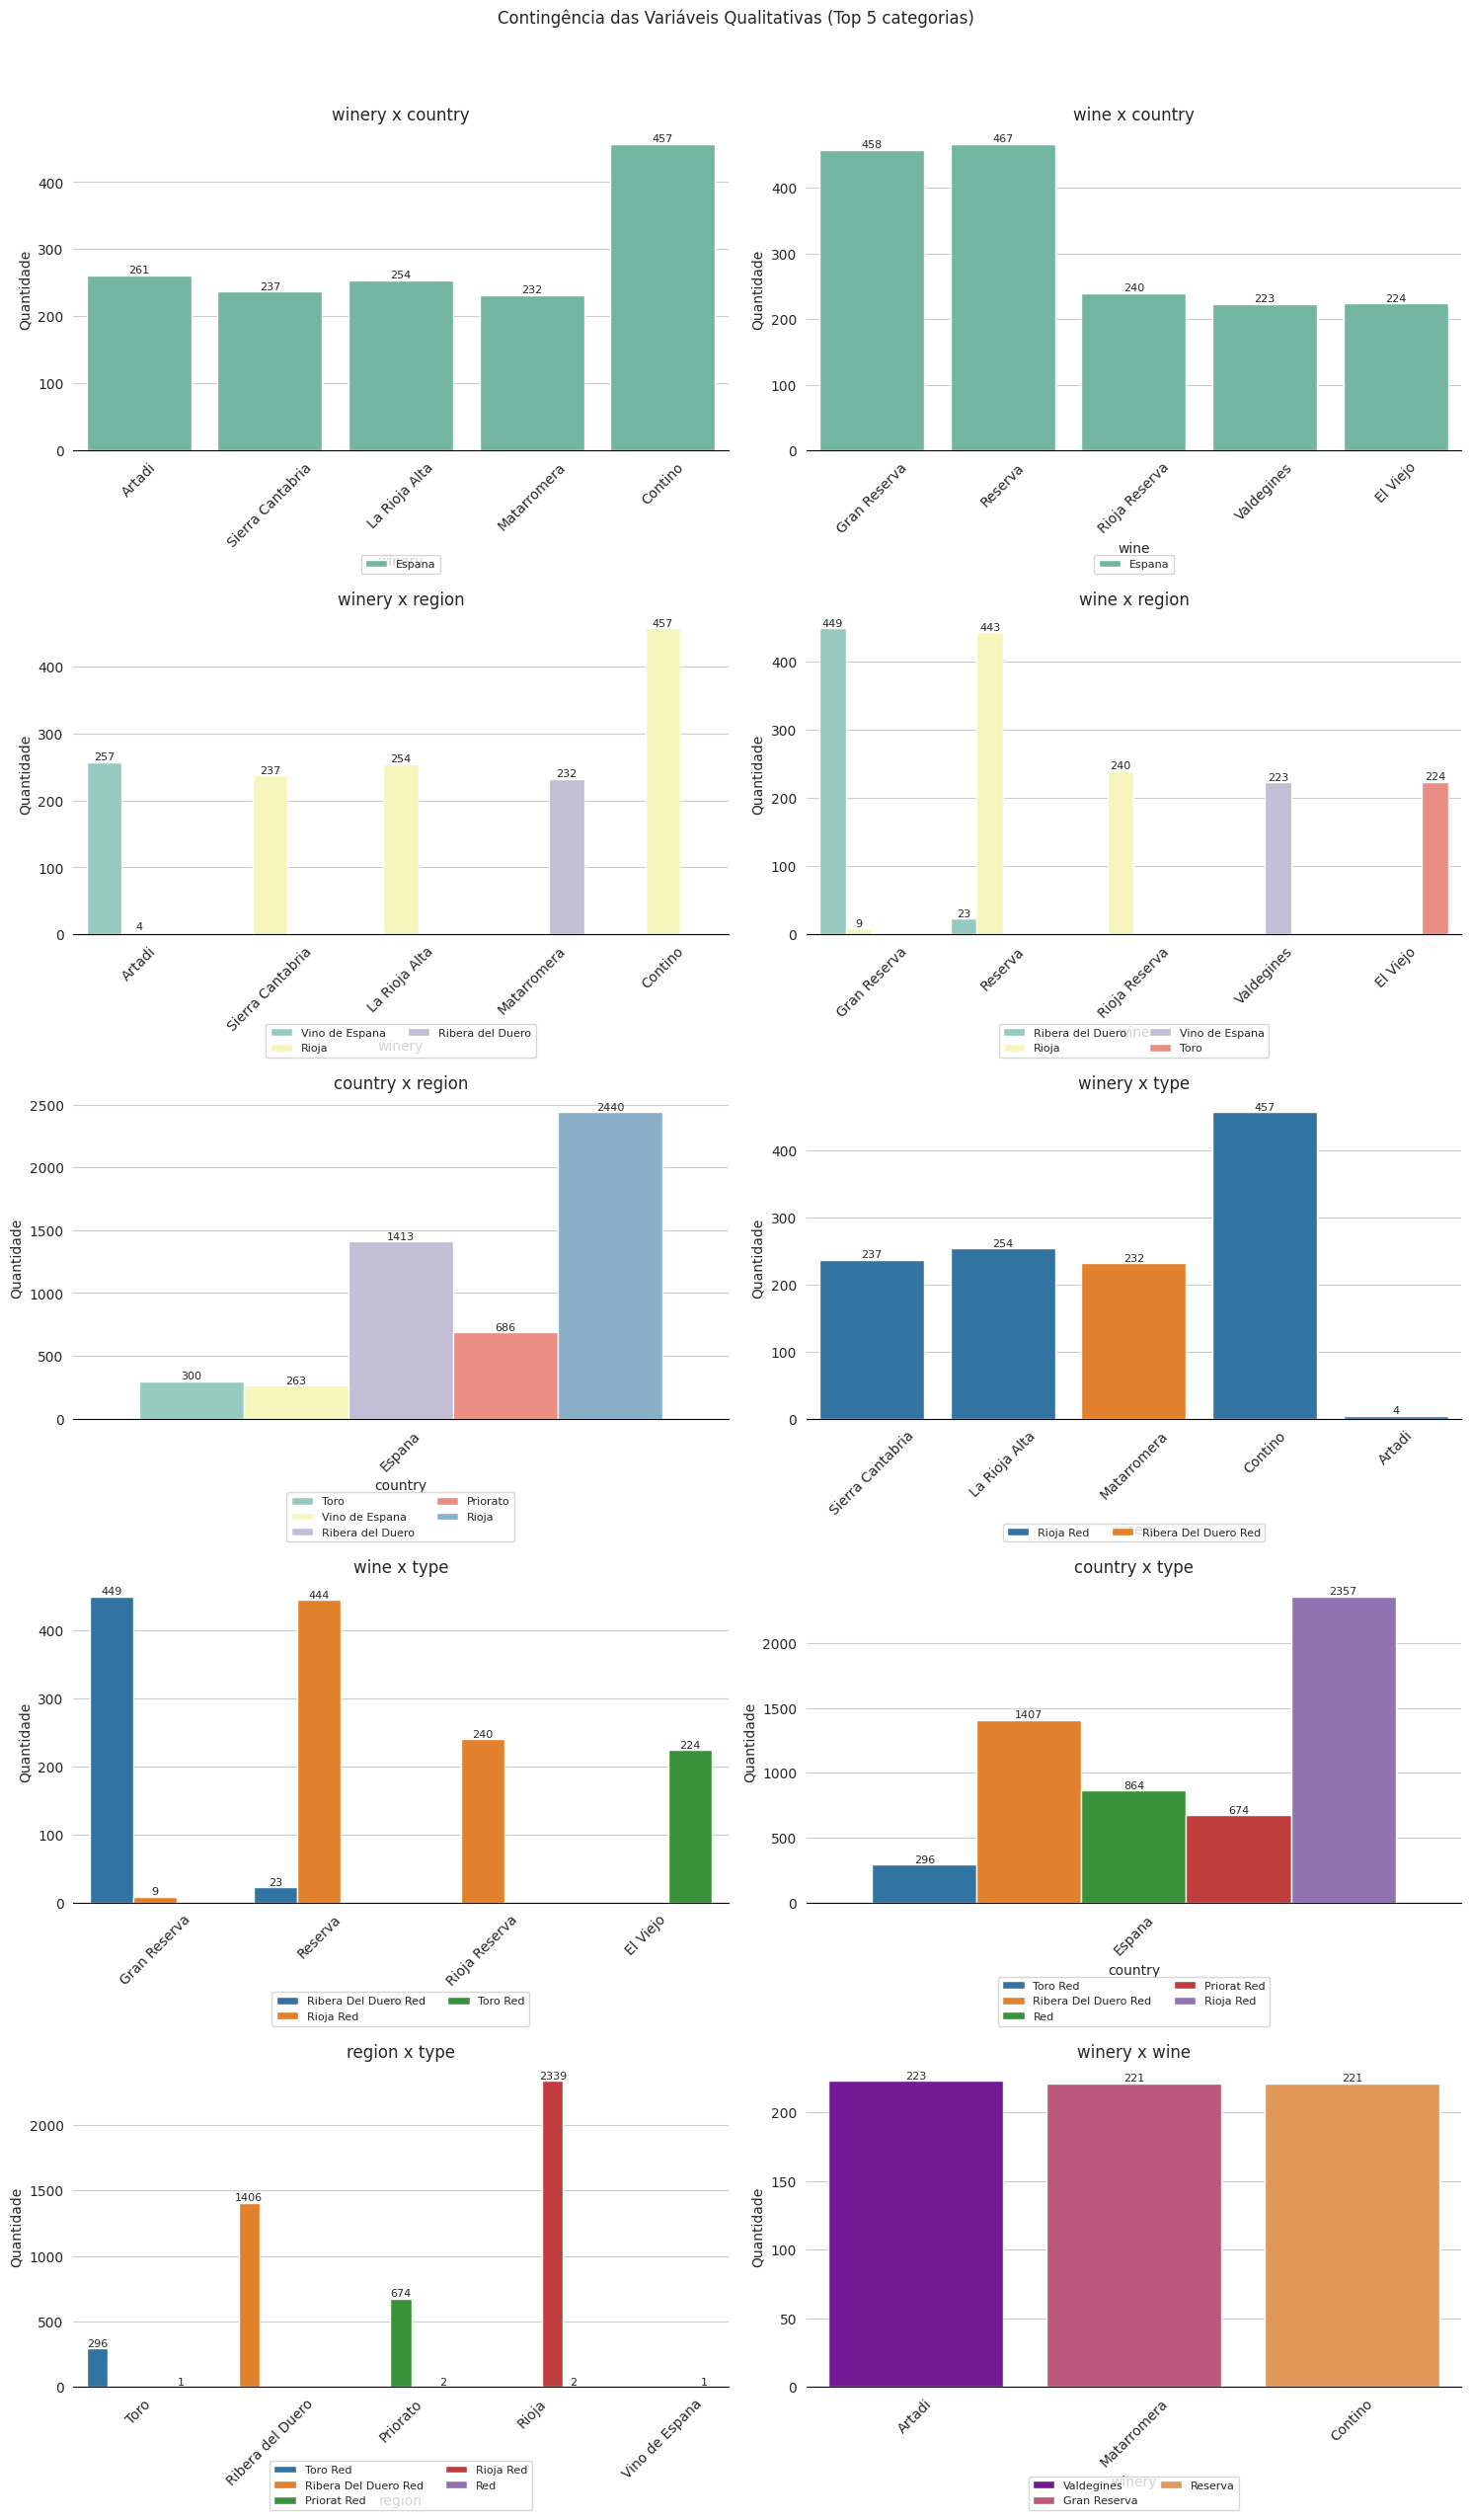

In [ ]:
# Variáveis qualitativas
variaveis_qualitativas = ['winery', 'wine', 'country', 'region', 'type']

# Configurar estilo
sns.set_style('whitegrid')

# Gerar combinações
combinacoes = sorted(
    itertools.combinations(variaveis_qualitativas, 2),
    key=lambda x: x[1]
)

# Calcular número de subplots necessários
n_combinacoes = len(combinacoes)
n_cols = 2
n_rows = (n_combinacoes + n_cols - 1) // n_cols  # Arredondar para cima

# Criar figura
fig, axes = plt.subplots(figsize=(15, 5*n_rows), ncols=n_cols, nrows=n_rows, squeeze=False)
axes = axes.flatten()

# Paleta de cores (você pode personalizar)
palette_dict = {
    'winery': 'viridis',
    'wine': 'plasma',
    'country': 'Set2',
    'region': 'Set3',
    'type': 'tab10'
}

for i, (var_1, var_2) in enumerate(combinacoes):
    # Para evitar muitos valores, usar apenas top categorias
    top_cat_1 = df[var_1].value_counts().head(5).index
    top_cat_2 = df[var_2].value_counts().head(5).index

    # Filtrar dados para top categorias
    df_filtrado = df[df[var_1].isin(top_cat_1) & df[var_2].isin(top_cat_2)]

    # Criar countplot
    ax = sns.countplot(data=df_filtrado, x=var_1, hue=var_2,
                      ax=axes[i], palette=palette_dict.get(var_2, 'husl'))

    # Adicionar labels nas barras
    for container in ax.containers:
        ax.bar_label(container, fmt="%d", fontsize=8)

    # Configurar o gráfico
    ax.set(
        title=f"{var_1} x {var_2}",
        ylabel="Quantidade",
        xlabel=var_1
    )

    # Rotacionar labels do eixo x se necessário
    ax.tick_params(axis='x', rotation=45)

    # Remover bordas
    for side in ["left", "top", "right"]:
        ax.spines[side].set_visible(False)
    ax.spines["bottom"].set_color("black")

    # Mover legenda
    sns.move_legend(
        ax, "lower center",
        bbox_to_anchor=(.5, -.4), ncol=2, title=None, fontsize=8
    )

# Ocultar eixos extras
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Contingência das Variáveis Qualitativas (Top 5 categorias)", y=1.02)
plt.tight_layout()
plt.show()

## Relação entre variáveis quantitativas e qualitativas
### Distribuição relativa

/tmp/ipython-input-1627605247.py:26: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.kdeplot(
/tmp/ipython-input-1627605247.py:26: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.kdeplot(
/tmp/ipython-input-1627605247.py:26: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.kdeplot(
/tmp/ipython-input-1627605247.py:26: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.kdeplot(
/tmp/ipython-input-1627605247.py:26: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.kdeplot(
/tmp/ipython-input-1627605247.py:26: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disa

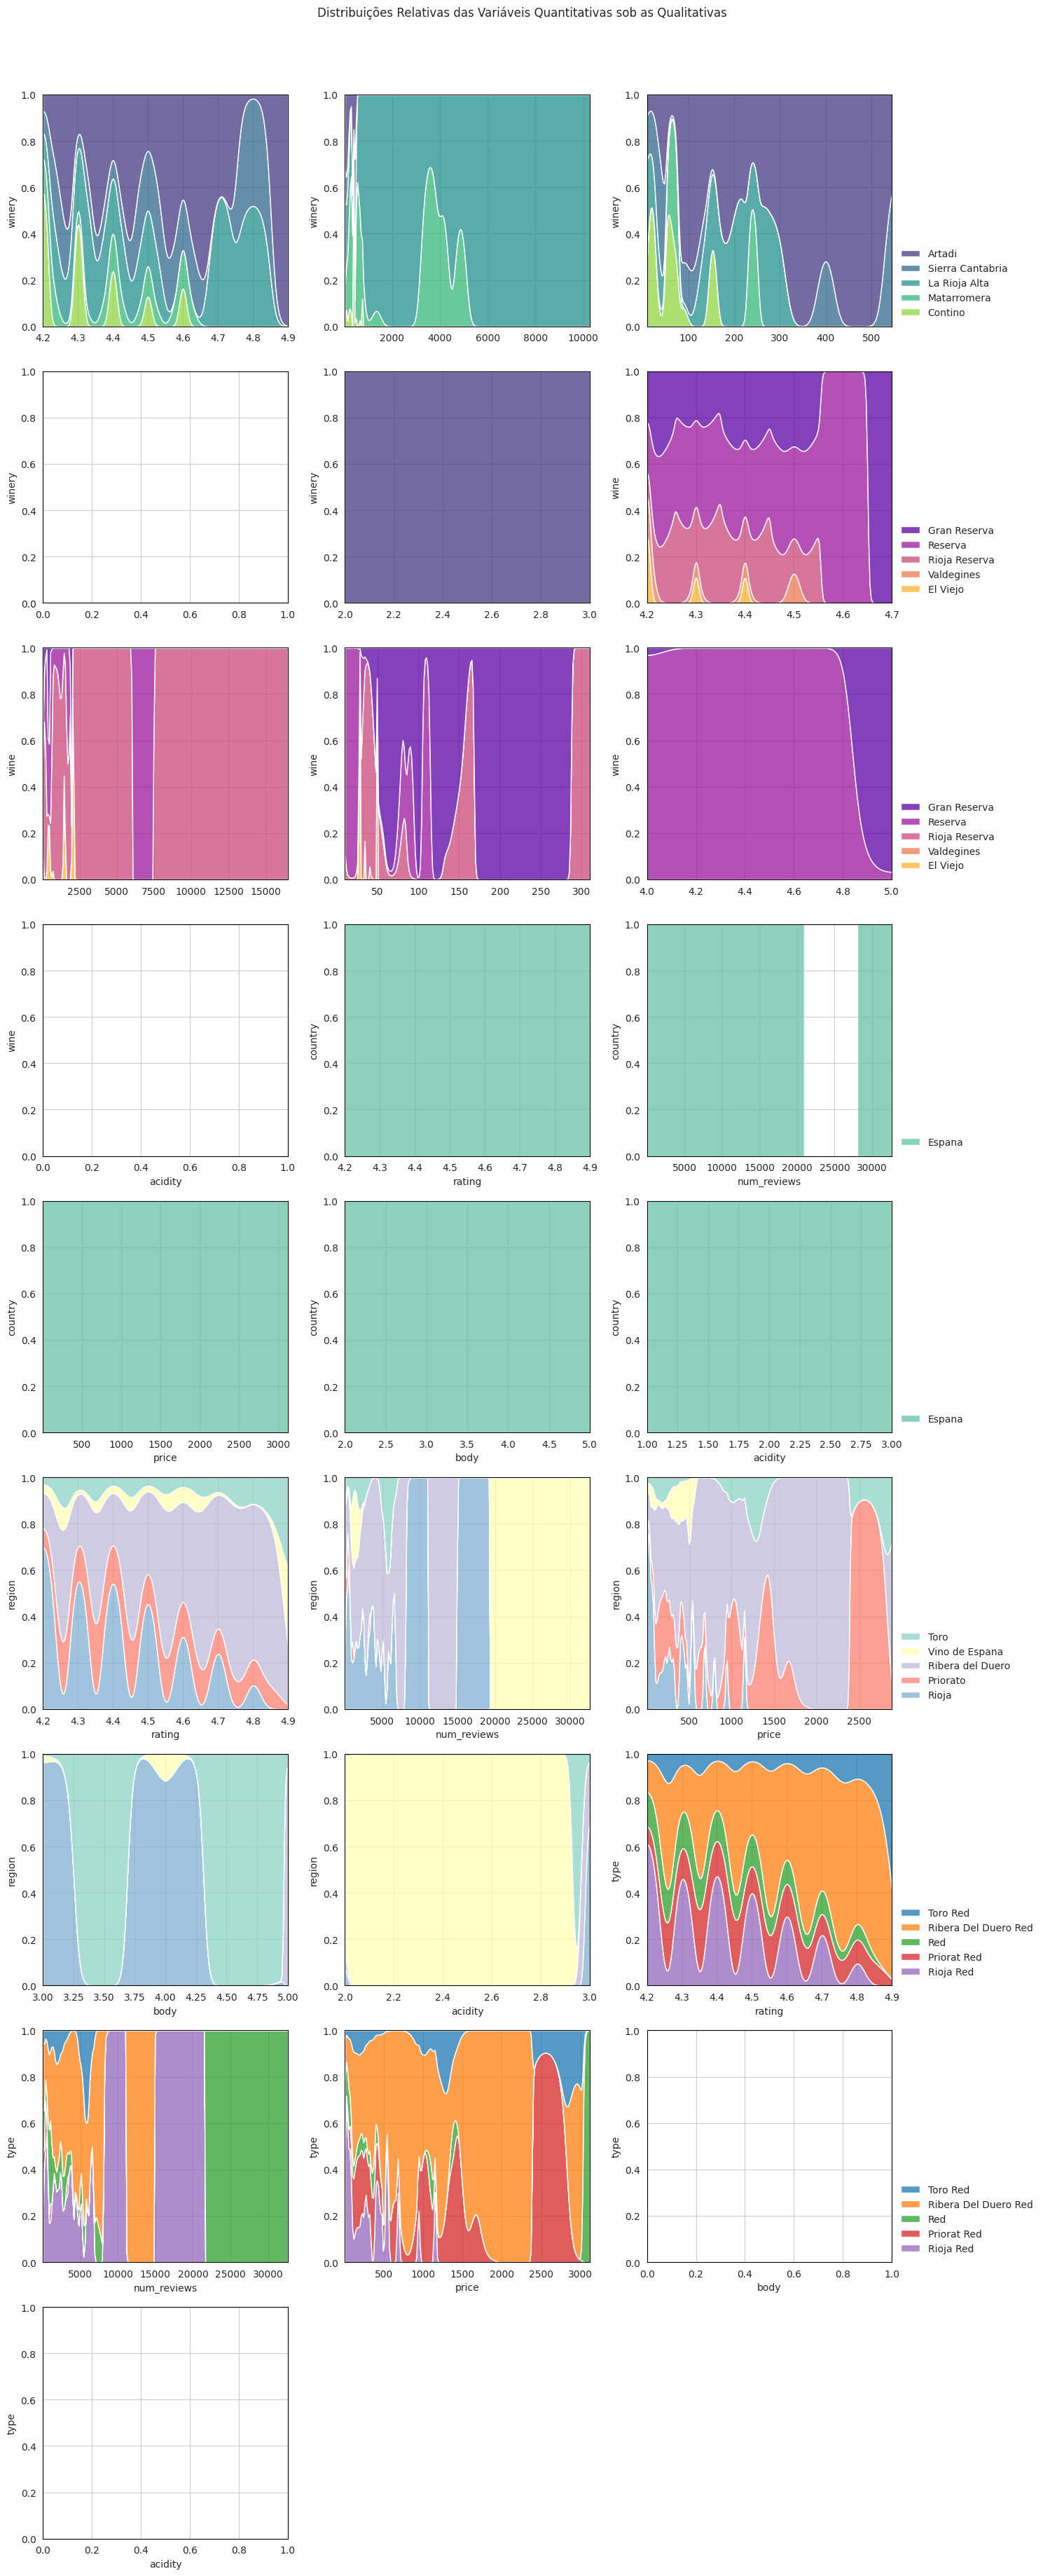

In [ ]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Variáveis
variaveis_qualitativas = ['winery', 'wine', 'country', 'region', 'type']
variaveis_quantitativas = ['rating', 'num_reviews', 'price', 'body', 'acidity']

# Definir paleta de cores
palette_dict = {
    'winery': 'viridis',
    'wine': 'plasma',
    'country': 'Set2',
    'region': 'Set3',
    'type': 'tab10'
}

# Função kde_plot adaptada
def kde_plot(df, x, y, axe, i):
    # Para evitar muitos valores, usar apenas top categorias
    top_categories = df[x].value_counts().head(5).index
    df_filtered = df[df[x].isin(top_categories)]

    legend = True if ((i+1) % 3 == 0) else False
    ax = sns.kdeplot(
        data=df_filtered, x=y, hue=x, cut=0,
        multiple="fill", palette=palette_dict.get(x, 'husl'),
        ax=axe, legend=legend
    )
    ax.set(
        ylabel=x,
        xlabel=y if i > 8 else "",
    )
    for side in ["left", "top", "right", "bottom"]:
        ax.spines[side].set_visible(True)
        ax.spines[side].set_color("black")

    if ((i+1) % 3 == 0):
        sns.move_legend(
            axe, "lower left", ncol=1, title=None,
            bbox_to_anchor=(1, 0), frameon=False
        )

# Gerar combinações
combinacoes = list(itertools.product(variaveis_qualitativas, variaveis_quantitativas))

# Calcular layout (5 qualitativas x 5 quantitativas = 25 combinações)
n_combinacoes = len(combinacoes)
n_cols = 3
n_rows = (n_combinacoes + n_cols - 1) // n_cols  # Arredondar para cima

fig, axes = plt.subplots(figsize=(15, 4*n_rows), ncols=n_cols, nrows=n_rows, squeeze=False, sharey=False)
axes = axes.flatten()

for i, (var_qualitativa, var_quantitativa) in enumerate(combinacoes):
    if i < len(axes):  # Garantir que não ultrapasse o número de eixos
        kde_plot(df, var_qualitativa, var_quantitativa, axes[i], i)

# Ocultar eixos extras
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Distribuições Relativas das Variáveis Quantitativas sob as Qualitativas', y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
#teste

duplicadas = df.duplicated()
print(f"Número de linhas duplicadas: {duplicadas.sum()}")
df_sem_dup = df.drop_duplicates()
df_sem_dup.isnull().sum()
df_sem_dup =df_sem_dup.dropna()

Número de linhas duplicadas: 5452


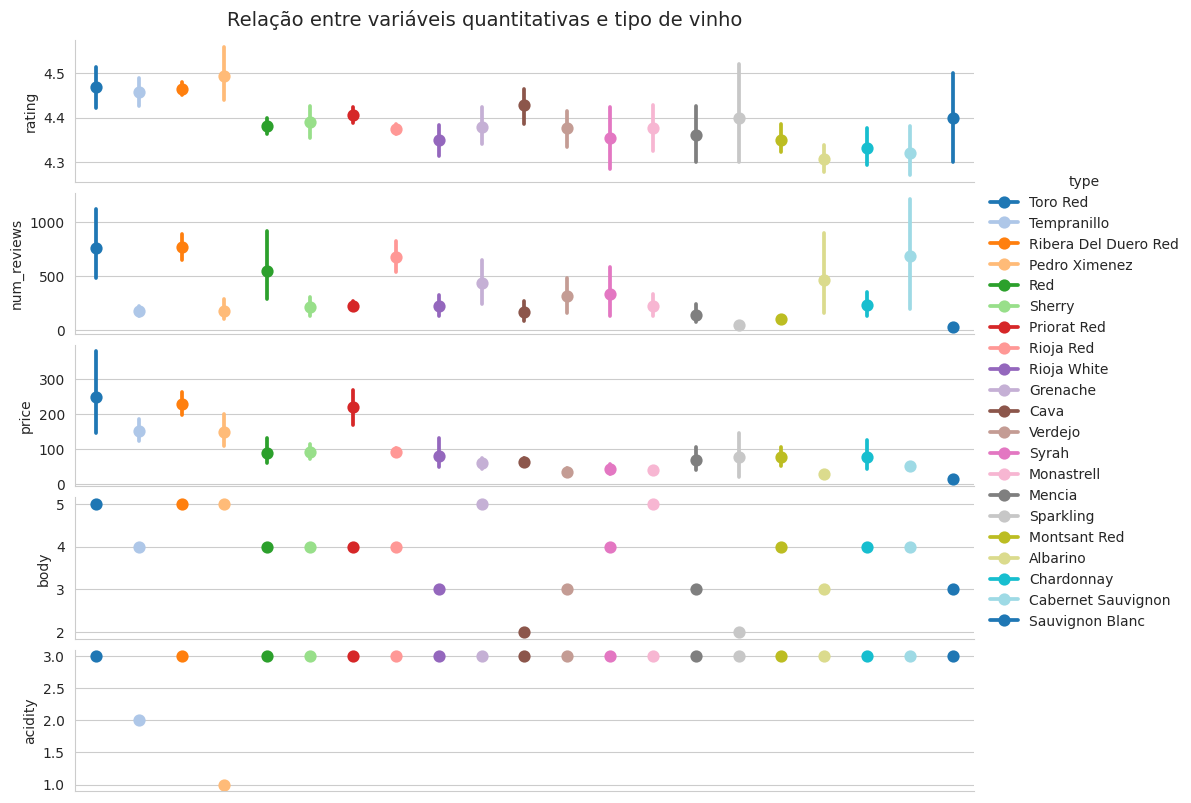

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

variaveis_qualitativas = ['type']
variaveis_quantitativas = ['rating', 'num_reviews', 'price', 'body', 'acidity']

g = sns.PairGrid(
    df_sem_dup, y_vars=variaveis_quantitativas, x_vars=variaveis_qualitativas, hue='type',
    height=3,palette="tab20"
)
g.fig.set_size_inches(12, 8)
g.map(sns.pointplot,legend=True)

plt.suptitle('Relação entre variáveis quantitativas e tipo de vinho ', fontsize=14, y=1.02)
g.add_legend()
g.set(xlabel=None)
g.set(xticklabels=[])


plt.show()

## Análise multivariada
### Distribuição conjunta

### Contingencia

/tmp/ipython-input-2224400615.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


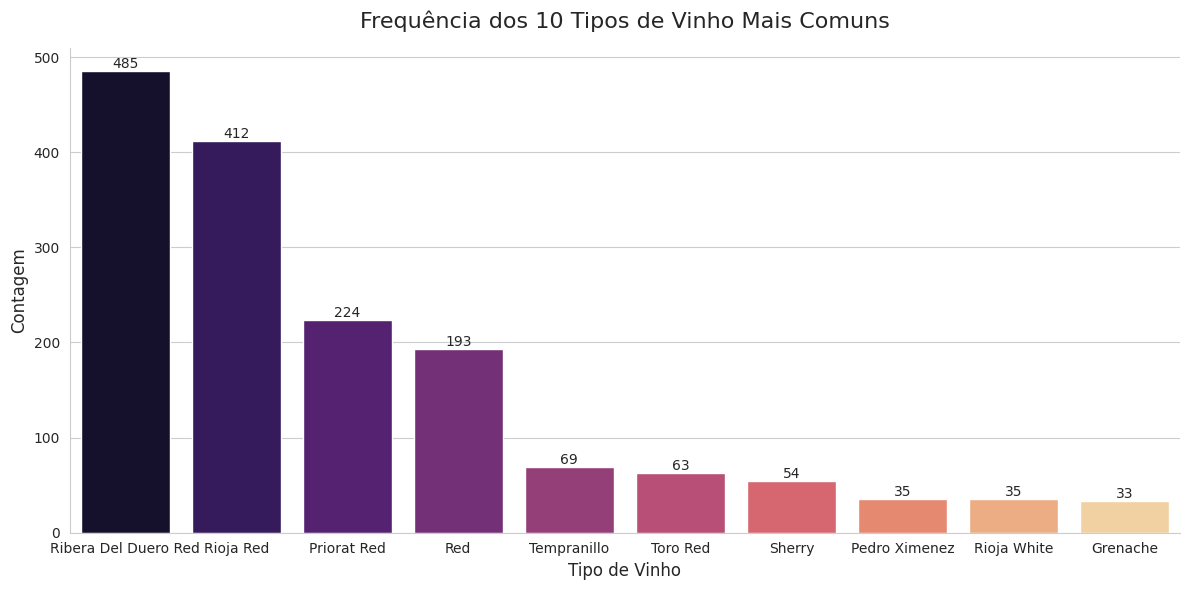

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


top_10_types = df_sem_dup['type'].value_counts().head(10)


sns.set_style('whitegrid')

plt.figure(figsize=(12, 6))

ax = sns.barplot(
    x=top_10_types.index,
    y=top_10_types.values,
    palette='magma'
)

ax.set_title('Frequência dos 10 Tipos de Vinho Mais Comuns', fontsize=16, pad=15)
ax.set_xlabel('Tipo de Vinho', fontsize=12)
ax.set_ylabel('Contagem', fontsize=12)

sns.despine(top=True, right=True)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

Para melhorar a analise vamos analisar so os types mais comuns dos dados

In [ ]:
import pandas as pd

top_10_types_list = df_sem_dup['type'].value_counts().head(10).index.tolist()

df_top_10_types = df_sem_dup[df_sem_dup['type'].isin(top_10_types_list)].copy()


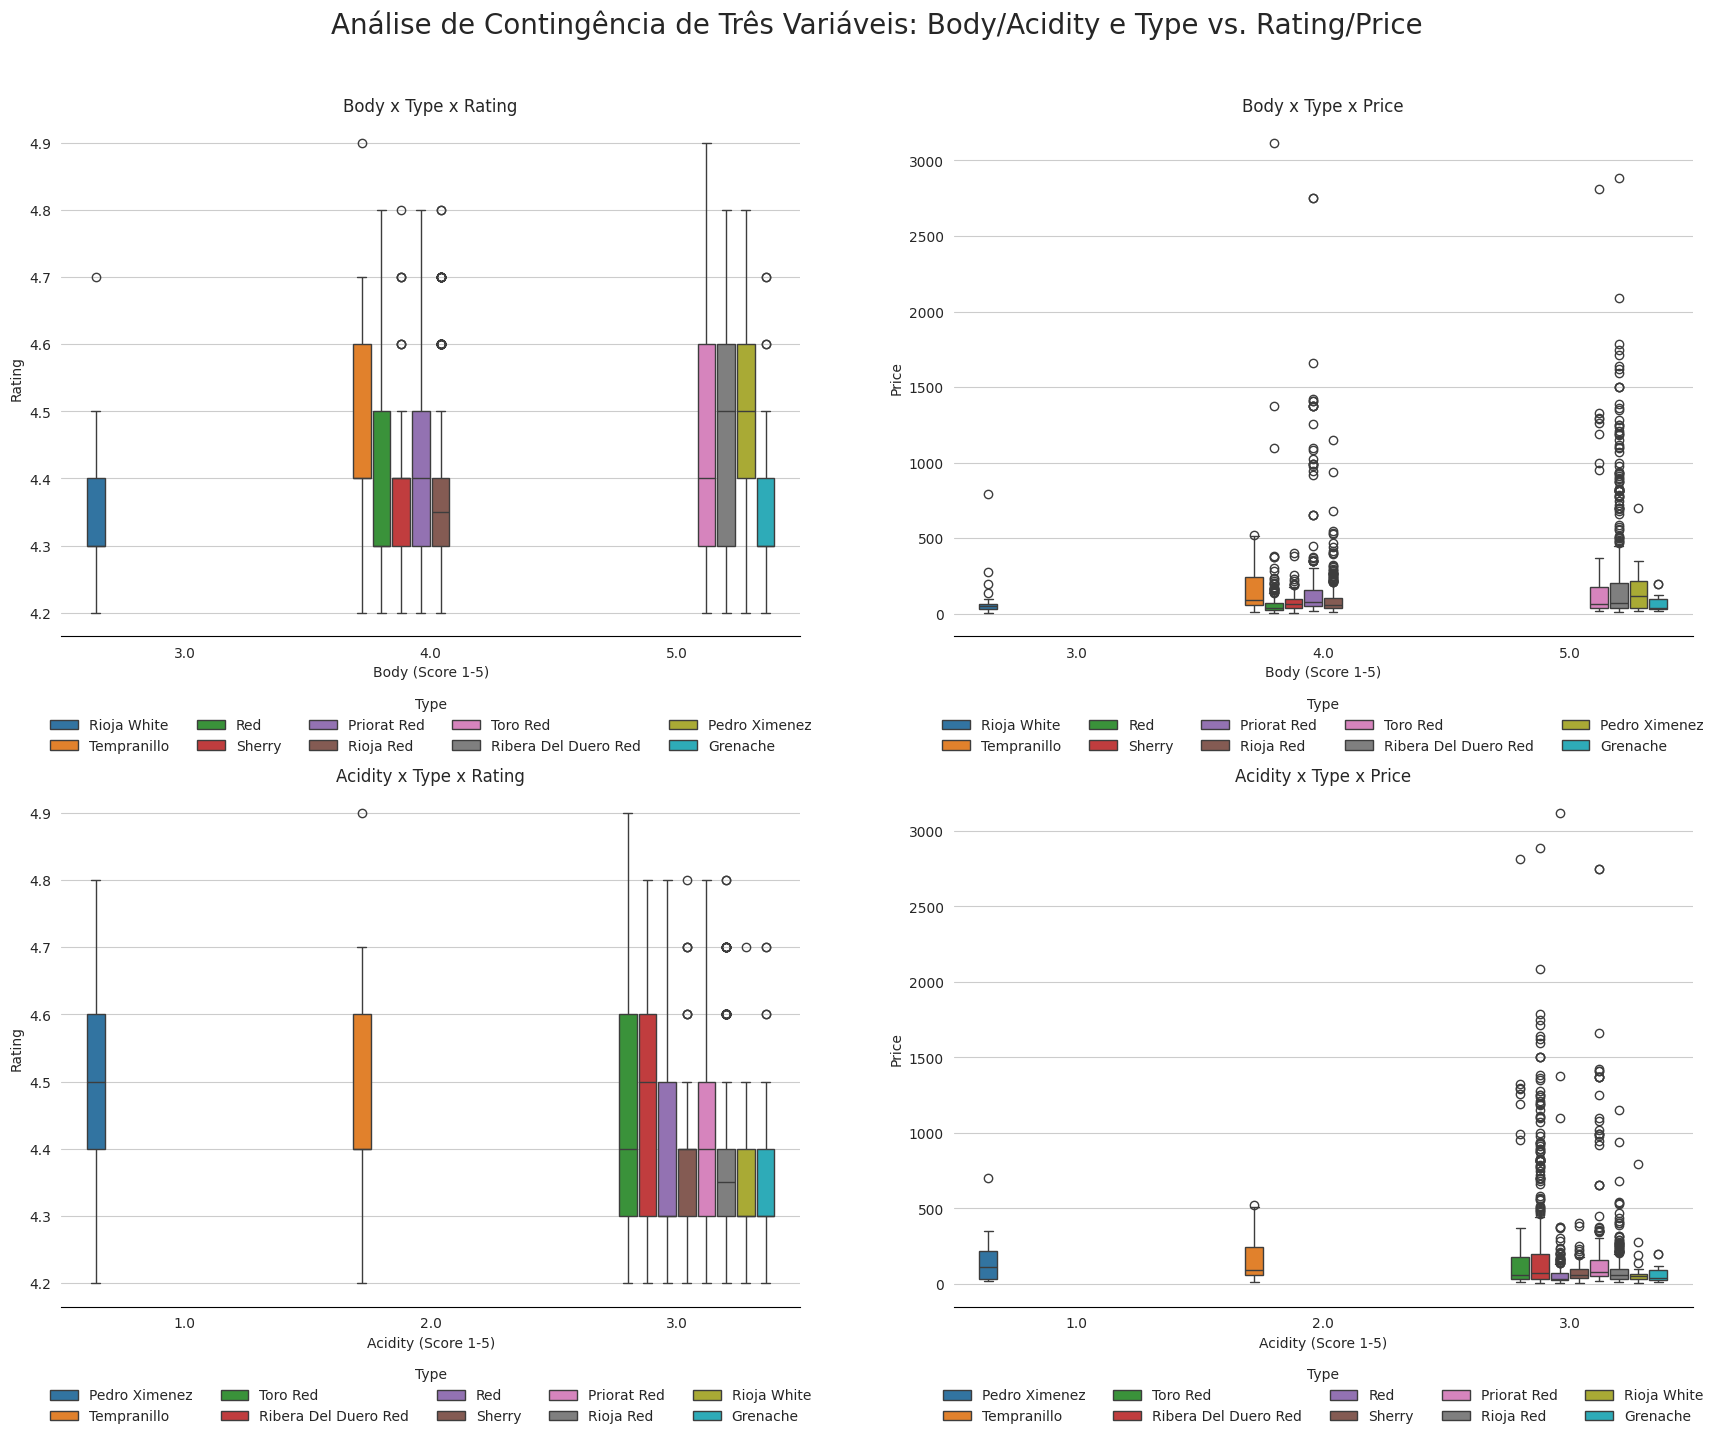

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

df_analise = df_top_10_types

variaveis_x = ['body', 'acidity']
variaveis_y = ['rating', 'price']
var_hue = 'type'

sns.set_style('whitegrid')

fig, axes = plt.subplots(
    figsize=(18, 14),
    ncols=2,
    nrows=2
)
axes = axes.flatten()

combinacoes_plot = list(itertools.product(variaveis_x, variaveis_y))

for i, (var_x, var_y) in enumerate(combinacoes_plot):
    ax = sns.boxplot(
        data=df_analise,
        x=var_x,
        y=var_y,
        hue=var_hue,
        ax=axes[i],
        gap=.1,
        palette="tab10"
    )

    ax.set(
        title=f"{var_x.capitalize()} x {var_hue.capitalize()} x {var_y.capitalize()}",
        xlabel=f"{var_x.capitalize()} (Score 1-5)",
        ylabel=var_y.capitalize()
    )

    for side in ["left", "top", "right"]:
        ax.spines[side].set_visible(False)
    ax.spines["bottom"].set_color("black")

    sns.move_legend(
        axes[i], "lower center",
        bbox_to_anchor=(.5, -0.25), ncol=5, title=var_hue.capitalize(), frameon=False
    )

plt.suptitle(
    "Análise de Contingência de Três Variáveis: Body/Acidity e Type vs. Rating/Price",
    y=1.02,
    fontsize=20
)
plt.tight_layout()
plt.show()

## Sumário de insights e hipóteses
-


# Daqui pra baixo são nossos testes com os dados

<Axes: xlabel='rating', ylabel='count'>

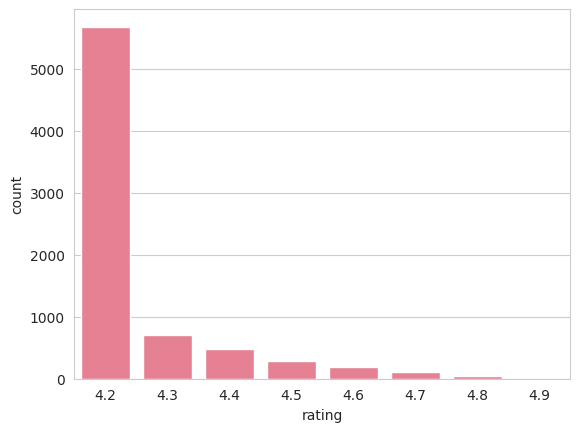

In [ ]:
sns.countplot(x='rating', data=df)

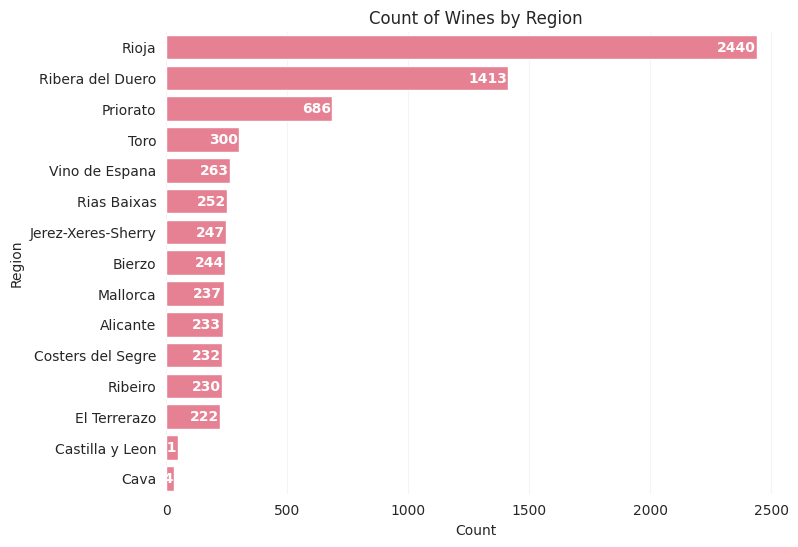

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_regions = df['region'].value_counts()
filtered_regions = filtered_regions[filtered_regions > 30].index

plt.figure(figsize=(8,6))
ax = sns.countplot(
    y='region',
    data=df[df['region'].isin(filtered_regions)],
    order=filtered_regions,

)

# remover as bordas (spines)
sns.despine(left=True, bottom=True)

# adicionar rótulos dentro de cada barra
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width - 5,               # posição x (um pouco antes do final da barra)
        p.get_y() + p.get_height() / 2,  # posição y (meio da barra)
        int(width),              # valor (contagem)
        ha='right', va='center', color='white', fontsize=10, fontweight='bold'
    )

ax.set_xlabel('Count')
ax.set_ylabel('Region')
ax.set_title('Count of Wines by Region')
plt.grid(axis='x', alpha=0.2)
plt.show()


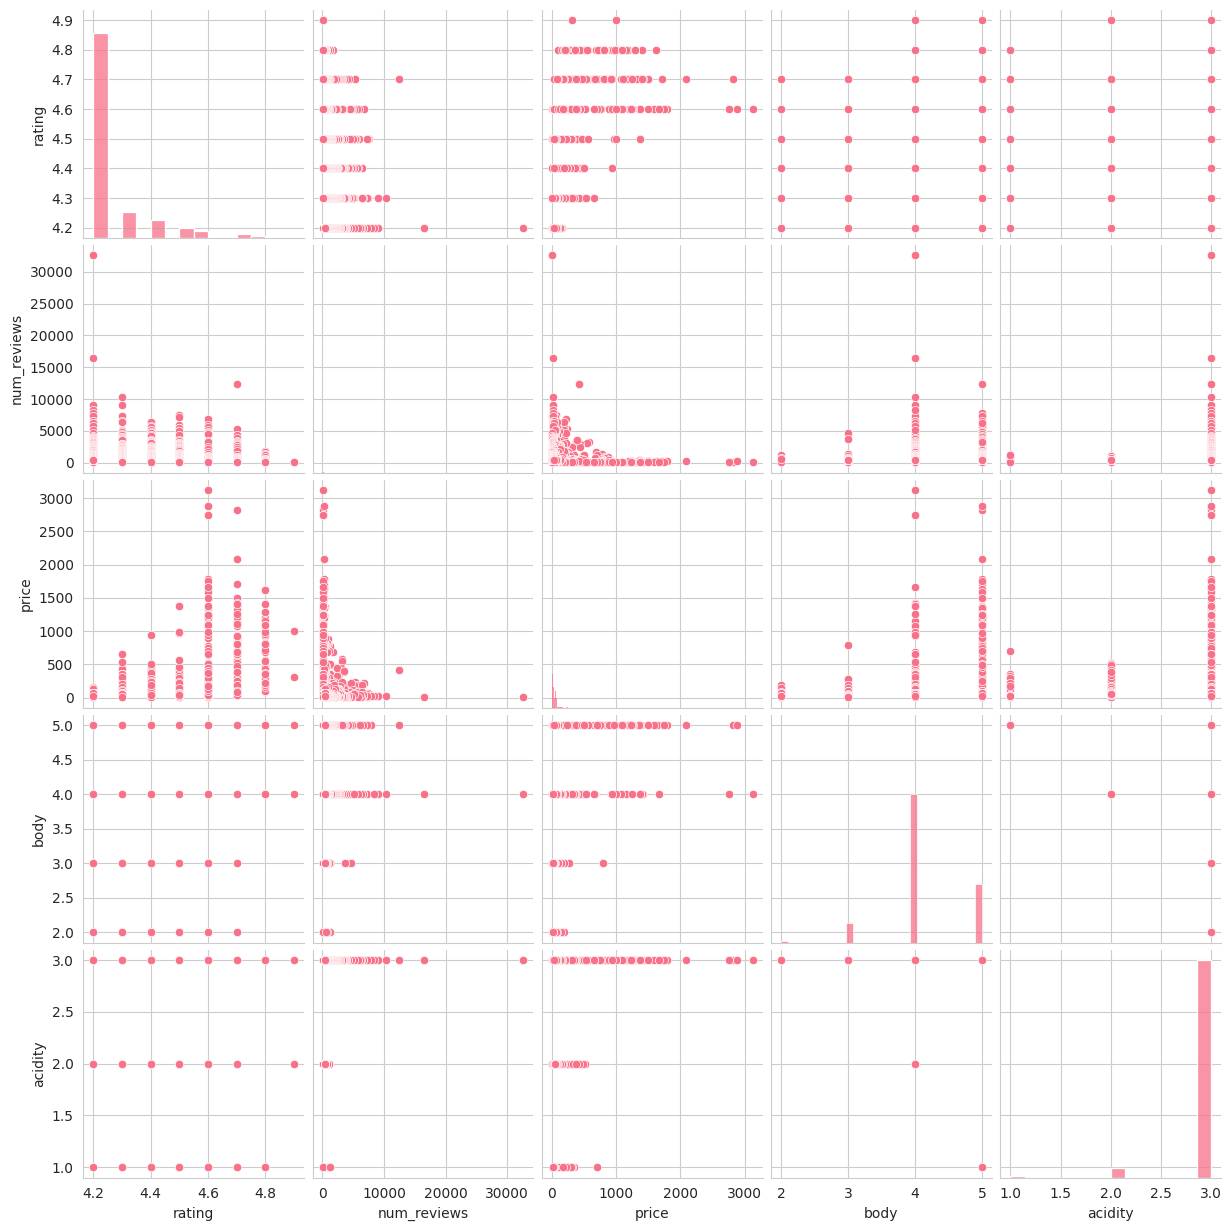

In [ ]:
sns.pairplot(data=df)

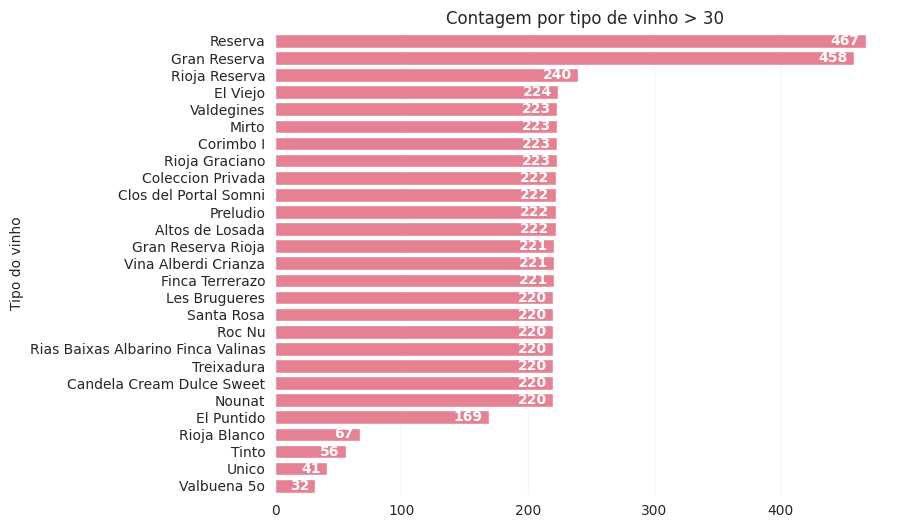

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_regions = df['wine'].value_counts()
filtered_regions = filtered_regions[filtered_regions > 30].index

plt.figure(figsize=(8,6))
ax = sns.countplot(
    y='wine',
    data=df[df['wine'].isin(filtered_regions)],
    order=filtered_regions,
)

# remover as bordas (spines)
sns.despine(left=True, bottom=True)

# adicionar rótulos dentro de cada barra
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width - 5,               # posição x (um pouco antes do final da barra)
        p.get_y() + p.get_height() / 2,  # posição y (meio da barra)
        int(width),              # valor (contagem)
        ha='right', va='center', color='white', fontsize=10, fontweight='bold'
    )

ax.set_xlabel('')
ax.set_ylabel('Tipo do vinho')
ax.set_title('Contagem por tipo de vinho > 30')
plt.grid(axis='x', alpha=0.2)
plt.show()

In [ ]:
df.columns[()]

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region',
       'price', 'type', 'body', 'acidity'],
      dtype='object')

## Valores Duplicados

In [ ]:
# Verificar se existem linhas duplicadas
duplicadas = df.duplicated()
print(f"Número de linhas duplicadas: {duplicadas.sum()}")

linhas_duplicadas = df[duplicadas]
print(linhas_duplicadas)

Número de linhas duplicadas: 5452
                    winery             wine  year  rating  num_reviews  \
1800        Bodega Tameran       Marmajuelo  2020     4.3           27   
2036        Ramon do Casar       Treixadura  2020     4.2          407   
2039              Binigrau           Nounat  2020     4.2          404   
2050          La Vicalanda          Reserva  2015     4.2          420   
2051       Enrique Mendoza       Santa Rosa  2017     4.2          420   
...                    ...              ...   ...     ...          ...   
7495               Contino          Reserva  2016     4.2          392   
7496  Conreria d'Scala Dei    Les Brugueres  2018     4.2          390   
7497           Mustiguillo  Finca Terrerazo  2017     4.2          390   
7498           Matarromera     Gran Reserva  2011     4.2          389   
7499              Sei Solo         Preludio  2016     4.2          388   

     country            region  price                  type  body  acidity  


In [ ]:
#df.info()
df.isnull().sum()
df=df.dropna()

In [ ]:
df.describe()

,rating,num_reviews,price,body,acidity
count,6329.000000,6329.000000,6329.000000,6329.000000,6329.000000
mean,4.259425,442.292463,65.659082,4.158319,2.946753
std,0.124306,718.597235,162.599997,0.583345,0.247955
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,388.000000,19.980000,4.000000,3.000000
50%,4.200000,402.000000,29.150000,4.000000,3.000000
75%,4.200000,415.000000,60.950000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [ ]:
import seaborn as sns

<Axes: >

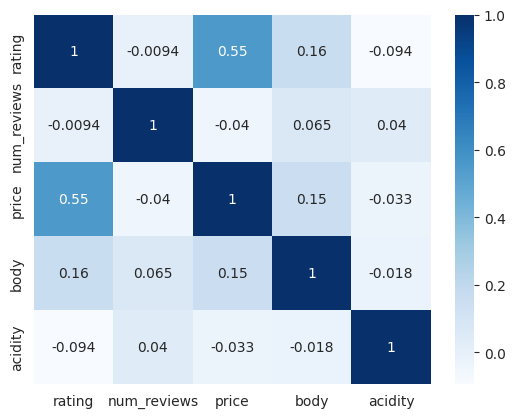

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")

Baixa correlacao linear, testar outros metodos para ver se tem uma correlacao nao linear

Text(0.5, 1.0, 'Matriz de Correlação (Kendall)')

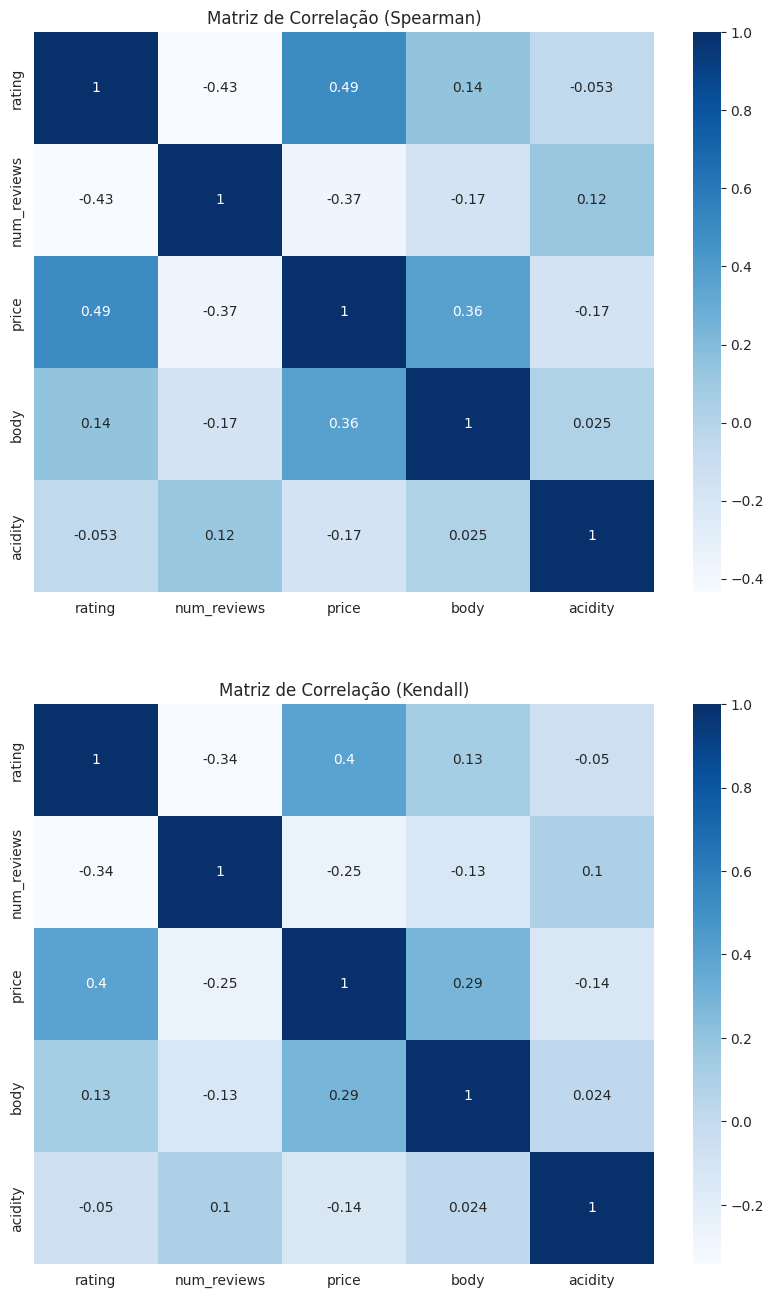

In [ ]:
corr_spearman = df.corr(method="spearman", numeric_only=True)

corr_kendall = df.corr(method="kendall", numeric_only=True)

fig, axes = plt.subplots(2, 1, figsize=(10, 16))


sns.heatmap(corr_spearman, annot=True, cmap="Blues", ax=axes[0])
axes[0].set_title("Matriz de Correlação (Spearman)")

sns.heatmap(corr_kendall, annot=True, cmap="Blues", ax=axes[1])
axes[1].set_title("Matriz de Correlação (Kendall)")

NUM_reviews devia ser uma variavel importante pra analise? acho que nao, talvez usar uma quantidade minima de reviews para aceitar os dados ajude a deixar menos viesado e mostre uma relacao mais forte entre as variaveis fazer sem as duplicadas tbm

In [ ]:
duplicadas = df.duplicated()
print(f"Número de linhas duplicadas: {duplicadas.sum()}")
df_sem_dup = df.drop_duplicates()

Número de linhas duplicadas: 4554


In [ ]:
df_sem_dup.describe()

,rating,num_reviews,price,body,acidity
count,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000
mean,4.411887,538.023662,148.786017,4.258592,2.921690
std,0.150982,1352.363601,289.401877,0.652938,0.334181
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.300000,56.000000,33.015000,4.000000,3.000000
50%,4.400000,134.000000,58.260000,4.000000,3.000000
75%,4.500000,499.000000,125.000000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [ ]:
df_sem_dup = df_sem_dup.drop(columns=['country'])

<Axes: >

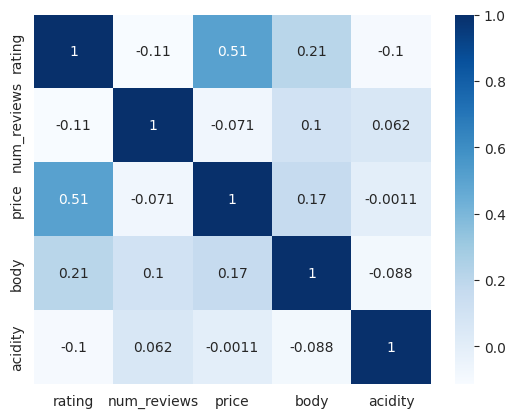

In [ ]:
sns.heatmap(df_sem_dup.corr(numeric_only=True), annot=True, cmap="Blues")

# **PARTE 02**

# Separando os dados que vao ser usados para regressao e criando uma nova coluna chamado tinto que vai representar quando o vinho é tinto = 1 e quando nao é =0

In [ ]:
indicadores_tinto = [
    'Rioja Red','Ribera Del Duero Red	', 'Red','Priorat Red', 'Tempranillo','Toro Red','Mencia', 'Grenache', 'Montsant Red', 'Monastrell', 'Syrah', 'Cabernet Sauvignon	'   # Adicionei Montsant também, pois é uma DO de tintos
]
df_sem_dup['tinto'] = df_sem_dup['type'].apply(
    lambda x: 1 if any(indicador.lower() in x.lower() for indicador in indicadores_tinto) else 0
)

<Axes: >

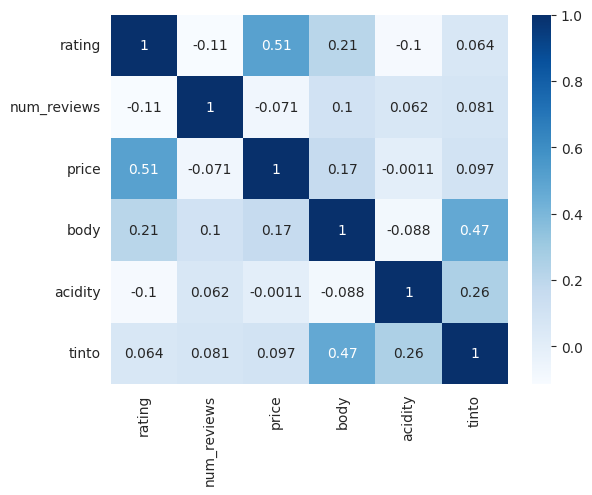

In [ ]:
sns.heatmap(df_sem_dup.corr(numeric_only=True), annot=True, cmap="Blues")

Separar a variavel dependente das independentes

In [ ]:
#  df_sem_dup = df_sem_dup[df_sem_dup['year'] != 'N.V.']
#  df_sem_dup['year'] = df_sem_dup['year'].astype(int)
#  for col in df_sem_dup.columns:
#      if df_sem_dup[col].dtype == 'object':
#          print(str(col))
#          label = LabelEncoder()
#          label = label.fit(df_sem_dup[col])
#          df_sem_dup[col] = label.transform(df_sem_dup[col].astype(str))

winery
wine
region
type


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


encoder = OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore')
cat_cols = [col for col in df_sem_dup.columns if df_sem_dup[col].dtype == 'object']
encoded = encoder.fit_transform(df_sem_dup[cat_cols])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_cols), index=df_sem_dup.index)


df_sem_dup = pd.concat([df_sem_dup.drop(columns=cat_cols), encoded_df], axis=1)

In [ ]:
df_sem_dup = (df_sem_dup-df_sem_dup.mean())/df_sem_dup.std()
X = df_sem_dup.drop(['price'], axis=1)

y = df_sem_dup['price']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Assumindo que você está usando um DataFrame

# 1. Defina o tamanho da figura (Ajuste width e height conforme necessário)
# Você pode tentar (10, 8), (12, 10) ou (15, 12) dependendo de quantas colunas você tem.
plt.figure(figsize=(12, 10))

# 2. Crie o mapa de calor com o tamanho ajustado
sns.heatmap(df_sem_dup.corr(numeric_only=True),
            annot=True,
            cmap="Blues",
            fmt=".2f" # Opcional: Garante que os valores tenham apenas 2 casas decimais
           )

# 3. Exiba a figura (Obrigatório em alguns ambientes, como scripts Python)
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7cd8cc9d3e20> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7cd8ab8959e0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
X

,rating,num_reviews,body,acidity,winery_AGE,winery_Aalto,winery_Abadal,winery_Abadia Retuerta,winery_Abel Mendoza Monge,winery_Acustic Celler,...,type_Ribera Del Duero Red,type_Rioja Red,type_Rioja White,type_Sauvignon Blanc,type_Sherry,type_Sparkling,type_Syrah,type_Tempranillo,type_Toro Red,type_Verdejo
0,3.232926,-0.354952,1.135496,0.234334,-0.023736,-0.07525,-0.041135,-0.106722,-0.047511,-0.023736,...,-0.612990,-0.549640,-0.141787,-0.041135,-0.177086,-0.053134,-0.085871,-0.201054,5.211458,-0.12189
1,3.232926,-0.374917,-0.396043,-2.758056,-0.023736,-0.07525,-0.041135,-0.106722,-0.047511,-0.023736,...,-0.612990,-0.549640,-0.141787,-0.041135,-0.177086,-0.053134,-0.085871,4.970987,-0.191777,-0.12189
2,2.570594,0.927987,1.135496,0.234334,-0.023736,-0.07525,-0.041135,-0.106722,-0.047511,-0.023736,...,1.630428,-0.549640,-0.141787,-0.041135,-0.177086,-0.053134,-0.085871,-0.201054,-0.191777,-0.12189
3,2.570594,0.862916,1.135496,0.234334,-0.023736,-0.07525,-0.041135,-0.106722,-0.047511,-0.023736,...,1.630428,-0.549640,-0.141787,-0.041135,-0.177086,-0.053134,-0.085871,-0.201054,-0.191777,-0.12189
4,2.570594,0.570095,1.135496,0.234334,-0.023736,-0.07525,-0.041135,-0.106722,-0.047511,-0.023736,...,1.630428,-0.549640,-0.141787,-0.041135,-0.177086,-0.053134,-0.085871,-0.201054,-0.191777,-0.12189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,-1.403397,-0.109456,-0.396043,0.234334,-0.023736,-0.07525,-0.041135,-0.106722,-0.047511,-0.023736,...,-0.612990,-0.549640,-0.141787,-0.041135,-0.177086,-0.053134,-0.085871,-0.201054,-0.191777,-0.12189
2046,-1.403397,-0.109456,-0.396043,0.234334,-0.023736,-0.07525,-0.041135,-0.106722,-0.047511,-0.023736,...,-0.612990,-0.549640,-0.141787,-0.041135,-0.177086,-0.053134,-0.085871,-0.201054,-0.191777,-0.12189
2047,-1.403397,-0.110195,1.135496,0.234334,-0.023736,-0.07525,-0.041135,-0.106722,-0.047511,-0.023736,...,1.630428,-0.549640,-0.141787,-0.041135,-0.177086,-0.053134,-0.085871,-0.201054,-0.191777,-0.12189
2048,-1.403397,-0.110934,1.135496,0.234334,-0.023736,-0.07525,-0.041135,-0.106722,-0.047511,-0.023736,...,1.630428,-0.549640,-0.141787,-0.041135,-0.177086,-0.053134,-0.085871,-0.201054,-0.191777,-0.12189


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# pipelines e transformadores
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.compose import ColumnTransformer

# codificação de variáveis
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.feature_extraction.text import CountVectorizer

# normalização
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# dados faltantes
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

# modelagem
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate, KFold, ShuffleSplit, RandomizedSearchCV


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [ ]:
X_train

,rating,num_reviews,body,acidity,winery_AGE,winery_Aalto,winery_Abadal,winery_Abadia Retuerta,winery_Abel Mendoza Monge,winery_Acustic Celler,...,type_Ribera Del Duero Red,type_Rioja Red,type_Rioja White,type_Sauvignon Blanc,type_Sherry,type_Sparkling,type_Syrah,type_Tempranillo,type_Toro Red,type_Verdejo
1903,4.2,918,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
535,4.5,72,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,4.3,45,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1557,4.3,77,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
570,4.5,48,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,4.3,27,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1677,4.3,45,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
542,4.5,66,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1626,4.3,56,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
models = {}
def train_validate_predict(regressor, x_train, y_train, x_test, y_test, index):
    model = regressor
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    models[index] = r2

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
model_list = [LinearRegression, Lasso, Ridge, BayesianRidge, DecisionTreeRegressor, LinearSVR, KNeighborsRegressor,
              RandomForestRegressor]
model_names = ['Linear Regression', 'Lasso', 'Ridge', 'Bayesian Ridge', 'Decision Tree Regressor', 'Linear SVR',
               'KNeighbors Regressor', 'Random Forest Regressor']

index = 0
for regressor in model_list:
    train_validate_predict(regressor(), X_train, y_train, X_test, y_test, model_names[index])
    index+=1

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
models

{'Linear Regression': 0.615146368255056,
 'Lasso': -5.969496472868485e-05,
 'Ridge': 0.6156805750323036,
 'Bayesian Ridge': 0.7032561642053266,
 'Decision Tree Regressor': 0.6061589539906642,
 'Linear SVR': 0.6891995488730616,
 'KNeighbors Regressor': 0.22376074375393484,
 'Random Forest Regressor': 0.7230287107955398}

In [ ]:
modelos = [
    {
        "nome": "LRG",
        "objeto": LinearRegression(),
        "hp": {}
    }, {
        "nome": "KNN",
        "objeto": KNeighborsRegressor(),
        "hp": {
            'n_neighbors': np.arange(1, 31, 5), # Número de vizinhos entre 1 e 30
            'weights': ['uniform', 'distance'], # Peso uniforme ou baseado na distância
            'p': [1, 2] # Distância de Manhattan (p=1) ou Euclidiana (p=2)
        }
    }, {
        "nome": "DTR",
        "objeto": DecisionTreeRegressor(random_state=42),
        "hp": {
            'max_depth': [None] + list(np.arange(2, 20, 4)), # Profundidade máxima
            'max_features': [None, 'sqrt', 'log2'] # Máximo de features
        }
    }, {
        "nome": "SVR",
        "objeto": SVR(),
        "hp": {
            'C': np.logspace(-3, 3, 10),     # Regularização
            'epsilon': np.logspace(-4, 0, 10),  # Insensibilidade à margem
            'kernel': ['linear', 'rbf', 'sigmoid'],  # Kernel a ser usado
        }
    }
]

In [ ]:
cv = ShuffleSplit(n_splits=30, test_size=.2, random_state=42)
metrics = {
    'neg_mean_absolute_error': 'MAE',
    'neg_mean_squared_error': 'MSE',
    'r2': 'R2',
    'neg_mean_absolute_percentage_error': 'MAPE'
}

results = []
# aplica validação cruzada em todos os modelos
for modelo in modelos:
    # aplicar random search
    random_search = RandomizedSearchCV(
        estimator=modelo["objeto"],
        param_distributions=modelo["hp"],
        n_iter=1 if modelo["nome"] == "LRG" else 10, # Número de combinações de parâmetros a testar
        scoring='neg_mean_squared_error',  # Métrica de avaliação
        cv=5, # Número de divisões para validação cruzada
        random_state=42, # Reprodutibilidade
        n_jobs=-1 # Paralelismo
    )
    # aplica validação cruzada
    approach = Pipeline(steps=[
        ("model", random_search)
    ])
    metric_results = cross_validate(approach, X=X, y=y.values.ravel(), cv=cv, scoring=list(metrics.keys()))
    # adiciona o nome do modelo ao dicionário de resultados
    metric_results['modelo'] = [modelo["nome"]] * len(metric_results['fit_time'])
    # adiciona os novos resultados a lista final de resultados
    results.append(pd.DataFrame(metric_results))
final_results = pd.concat(results, axis=0)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_base.py", line 682, in fit
    self.coef_, _, self.rank_, sel

KeyboardInterrupt: 

In [ ]:
# função para hilight de melhores resultados
def highlight_best(s, props=''):
    if s.name[1] != 'std':
        if s.name[0].endswith('time'):
            return np.where(s == np.min(s.values), props, '')
        if s.name[0].endswith('R2'):
            return np.where(s == np.max(s.values), props, '')
        return np.where(s == np.min(s.values), props, '')

# atualização de valores das métricas
for metric in metrics.keys():
    if 'neg' in metric:
        final_results[f"test_{metric}"] *= -1


# apresentação de resultados
(
    final_results
    .rename(columns={f"test_{name}": value for name, value in metrics.items()})
    .groupby("modelo").agg(["mean", "std"]).T
    .style
    .apply(highlight_best, props='color:white;background-color:gray;font-weight: bold;', axis=1)
    .set_table_styles([{'selector': 'td', 'props': 'text-align: center;'}])
)